In [1]:
# Mehmet VARAN

In [2]:
# importing libraries
import pandas as pd
import numpy as np

import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
from plotly.offline import init_notebook_mode, iplot, plot
init_notebook_mode(connected=True)
import plotly.express as px
import plotly.graph_objects as go

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.regularizers import l2, l1
from keras.metrics import BinaryAccuracy
from keras.layers import Flatten
from sklearn.metrics import fbeta_score, make_scorer
from sklearn.model_selection import cross_val_score

In [3]:
#reading test data as validation
datatest = pd.read_csv("datas/datatest.txt")
datatest

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
140,2015-02-02 14:19:00,23.700000,26.272000,585.200000,749.200000,0.004764,1
141,2015-02-02 14:19:59,23.718000,26.290000,578.400000,760.400000,0.004773,1
142,2015-02-02 14:21:00,23.730000,26.230000,572.666667,769.666667,0.004765,1
143,2015-02-02 14:22:00,23.722500,26.125000,493.750000,774.750000,0.004744,1
144,2015-02-02 14:23:00,23.754000,26.200000,488.600000,779.000000,0.004767,1
...,...,...,...,...,...,...,...
2800,2015-02-04 10:38:59,24.290000,25.700000,808.000000,1150.250000,0.004829,1
2801,2015-02-04 10:40:00,24.330000,25.736000,809.800000,1129.200000,0.004848,1
2802,2015-02-04 10:40:59,24.330000,25.700000,817.000000,1125.800000,0.004841,1
2803,2015-02-04 10:41:59,24.356667,25.700000,813.000000,1123.000000,0.004849,1


In [4]:
#reading test2 data as test
datatest2 = pd.read_csv("datas/datatest2.txt")
datatest2

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
1,2015-02-11 14:48:00,21.7600,31.133333,437.333333,1029.666667,0.005021,1
2,2015-02-11 14:49:00,21.7900,31.000000,437.333333,1000.000000,0.005009,1
3,2015-02-11 14:50:00,21.7675,31.122500,434.000000,1003.750000,0.005022,1
4,2015-02-11 14:51:00,21.7675,31.122500,439.000000,1009.500000,0.005022,1
5,2015-02-11 14:51:59,21.7900,31.133333,437.333333,1005.666667,0.005030,1
...,...,...,...,...,...,...,...
9748,2015-02-18 09:15:00,20.8150,27.717500,429.750000,1505.250000,0.004213,1
9749,2015-02-18 09:16:00,20.8650,27.745000,423.500000,1514.500000,0.004230,1
9750,2015-02-18 09:16:59,20.8900,27.745000,423.500000,1521.500000,0.004237,1
9751,2015-02-18 09:17:59,20.8900,28.022500,418.750000,1632.000000,0.004279,1


In [5]:
#reading datas as training
datatraining = pd.read_csv("datas/datatraining.txt")
datatraining

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
1,2015-02-04 17:51:00,23.18,27.2720,426.0,721.250000,0.004793,1
2,2015-02-04 17:51:59,23.15,27.2675,429.5,714.000000,0.004783,1
3,2015-02-04 17:53:00,23.15,27.2450,426.0,713.500000,0.004779,1
4,2015-02-04 17:54:00,23.15,27.2000,426.0,708.250000,0.004772,1
5,2015-02-04 17:55:00,23.10,27.2000,426.0,704.500000,0.004757,1
...,...,...,...,...,...,...,...
8139,2015-02-10 09:29:00,21.05,36.0975,433.0,787.250000,0.005579,1
8140,2015-02-10 09:29:59,21.05,35.9950,433.0,789.500000,0.005563,1
8141,2015-02-10 09:30:59,21.10,36.0950,433.0,798.500000,0.005596,1
8142,2015-02-10 09:32:00,21.10,36.2600,433.0,820.333333,0.005621,1


In [6]:
#converting to datetime and resetting indexes
datatest['date'] = pd.to_datetime(datatest['date'])
datatest2['date'] = pd.to_datetime(datatest2['date'])
datatraining['date'] = pd.to_datetime(datatraining['date'])
datatest.reset_index(drop=True, inplace=True)
datatest2.reset_index(drop=True, inplace=True)
datatraining.reset_index(drop=True, inplace=True)

In [7]:
datatraining.describe()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
count,8143.000000,8143.000000,8143.000000,8143.000000,8143.000000,8143.000000
mean,20.619084,25.731507,119.519375,606.546243,0.003863,0.212330
std,1.016916,5.531211,194.755805,314.320877,0.000852,0.408982
min,19.000000,16.745000,0.000000,412.750000,0.002674,0.000000
25%,19.700000,20.200000,0.000000,439.000000,0.003078,0.000000
50%,20.390000,26.222500,0.000000,453.500000,0.003801,0.000000
75%,21.390000,30.533333,256.375000,638.833333,0.004352,0.000000
max,23.180000,39.117500,1546.333333,2028.500000,0.006476,1.000000


In [8]:
# applying minmax scaler to features
scaler = MinMaxScaler()
columns = ['Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio']
scaler.fit(np.array(datatraining[columns]))
datatest[columns] = scaler.transform(np.array(datatest[columns]))
datatest2[columns] = scaler.transform(np.array(datatest2[columns]))
datatraining[columns] = scaler.transform(np.array(datatraining[columns]))

       Temperature     Humidity        Light          CO2  HumidityRatio
count  8143.000000  8143.000000  8143.000000  8143.000000    8143.000000
mean      0.387341     0.401676     0.077292     0.119942       0.312576
std       0.243281     0.247233     0.125947     0.194536       0.224186
min       0.000000     0.000000     0.000000     0.000000       0.000000
25%       0.167464     0.154431     0.000000     0.016246       0.106304
50%       0.332536     0.423623     0.000000     0.025220       0.296338
75%       0.571770     0.616307     0.165795     0.139925       0.441308
max       1.000000     1.000000     1.000000     1.000000       1.000000


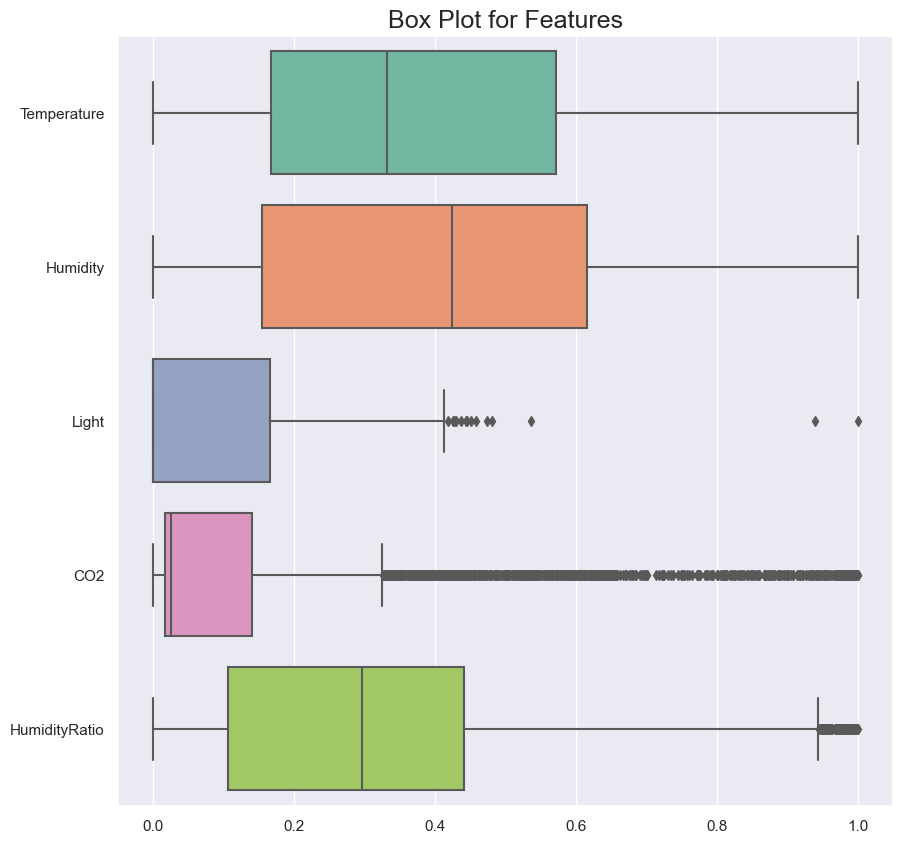

In [9]:
#plotting 
plt.figure(figsize=(10,10))
plt.title('Box Plot for Features', fontdict={'fontsize':18})
ax = sns.boxplot(data=datatraining.drop(['date', 'Occupancy'],axis=1), orient="h", palette="Set2")
print(datatraining.drop(['date', 'Occupancy'],axis=1).describe())

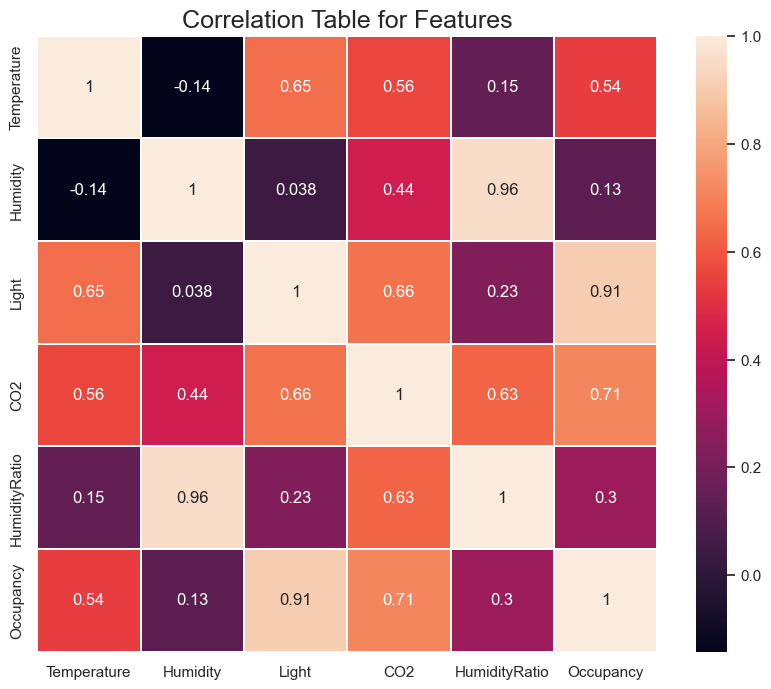

In [10]:
# correlation table 
plt.figure(figsize=(10,8))
plt.title('Correlation Table for Features', fontdict={'fontsize':18})
ax = sns.heatmap(datatraining.corr(), annot=True, linewidths=.2)

In [11]:
# 3d data expl
data = datatraining.copy()
data.Occupancy = data.Occupancy.astype(str)
fig = px.scatter_3d(data, x='Temperature', y='Humidity', z='CO2', size='Light', color='Occupancy', color_discrete_map={'1':'red', '0':'blue'})
fig.update_layout(scene_zaxis_type="log", title={'text': "Features and Occupancy",
                                                'y':0.9,
                                                'x':0.5,
                                                'xanchor': 'center',
                                                'yanchor': 'top'})
iplot(fig)

In [12]:
# splitting hours depending occupancy
hours_1 = []
hours_0 = []
for date in datatraining[datatraining['Occupancy'] == 1]['date']:
    hours_1.append(date.hour)
for date in datatraining[datatraining['Occupancy'] == 0]['date']:
    hours_0.append(date.hour)

c:\users\asus\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


c:\users\asus\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




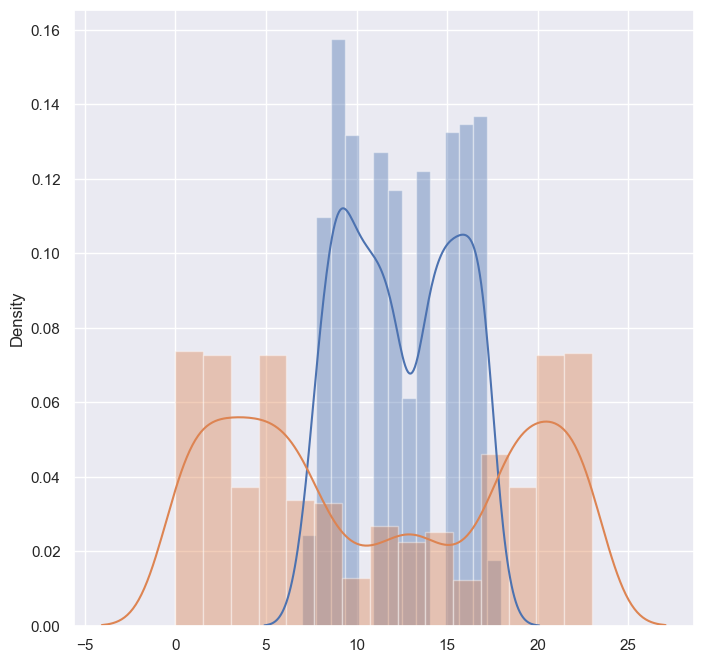

In [13]:
# plotting hours_1 and hours_0
plt.figure(figsize=(8,8))
ax = sns.distplot(hours_1)
ax = sns.distplot(hours_0)

In [14]:
# adding period of the day feature
datatest['period_of_day'] = [1 if (i.hour >= 7 and i.hour <= 17) else 0 for i in datatest['date']]
datatest2['period_of_day'] = [1 if (i.hour >= 7 and i.hour <= 17) else 0 for i in datatest2['date']]
datatraining['period_of_day'] = [1 if (i.hour >= 7 and i.hour <= 17) else 0 for i in datatraining['date']]
datatraining.sample(10)

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy,period_of_day
4139,2015-02-07 14:50:00,0.753589,0.044698,0.063214,0.017639,0.064913,0,1
1288,2015-02-05 15:19:00,0.861244,0.510783,0.305723,0.433700,0.553954,1,1
7032,2015-02-09 15:03:00,0.691388,0.887026,0.290688,0.750271,0.863473,1,1
4037,2015-02-07 13:08:00,0.980861,0.006481,0.171373,0.022435,0.071338,0,1
6129,2015-02-09 00:00:00,0.119617,0.462845,0.000000,0.028624,0.294747,0,0
6449,2015-02-09 05:19:59,0.106459,0.446977,0.000000,0.029553,0.278209,0,0
1190,2015-02-05 13:40:59,0.787081,0.421500,0.352662,0.289803,0.442222,0,1
2305,2015-02-06 08:16:00,0.428230,0.124260,0.270964,0.093610,0.074464,1,1
4990,2015-02-08 05:00:59,0.069378,0.663985,0.000000,0.017072,0.446432,0,0
7571,2015-02-10 00:02:00,0.332536,0.726562,0.000000,0.054309,0.583218,0,0


In [15]:
# determining data as train, test, valid
X_train = datatraining.drop(columns=['date', 'Occupancy'], axis=1)
y_train = datatraining['Occupancy']
X_validation = datatest.drop(columns=['date', 'Occupancy'], axis=1)
y_validation = datatest['Occupancy']
X_test = datatest2.drop(columns=['date', 'Occupancy'], axis=1)
y_test = datatest2['Occupancy']

In [16]:
# parameter-tuning for knn
n_neighbors_list = [7,15,45,135]
weights_list = ['uniform', 'distance']
metric_list = ['euclidean', 'manhattan']
accuracies = {}
for n in n_neighbors_list:
    for weight in weights_list:
        for metric in metric_list:
            knn_model = KNeighborsClassifier(n_neighbors=n, weights=weight, metric=metric)
            knn_model.fit(X_train, y_train)
            accuracy = knn_model.score(X_validation, y_validation)
            accuracies[str(n)+"/"+weight+"/"+metric] = accuracy

In [17]:
# plotting for knn models
plotdata = pd.DataFrame()
plotdata['Parameters'] = accuracies.keys()
plotdata['Accuracy'] = accuracies.values()
fig = px.line(plotdata, x="Parameters", y="Accuracy")
fig.update_layout(title={'text': "Accuracies for Different Hyper-Parameters",
                                                'x':0.5,
                                                'xanchor': 'center',
                                                'yanchor': 'top'})
iplot(fig)

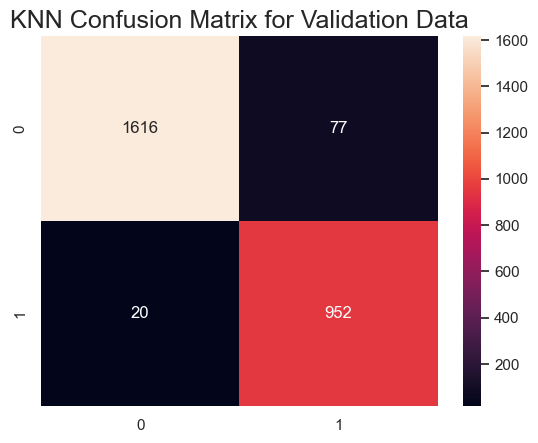

In [18]:
# knn model and confusion matrix
knn_model = KNeighborsClassifier(n_neighbors=135)
knn_model.fit(X_train, y_train)
y_pred = knn_model.predict(X_validation)
plt.title("KNN Confusion Matrix for Validation Data", fontdict={'fontsize':18})
ax = sns.heatmap(confusion_matrix(y_validation, y_pred), annot=True, fmt="d")

Accuracy for SVM on validation data: %97.82


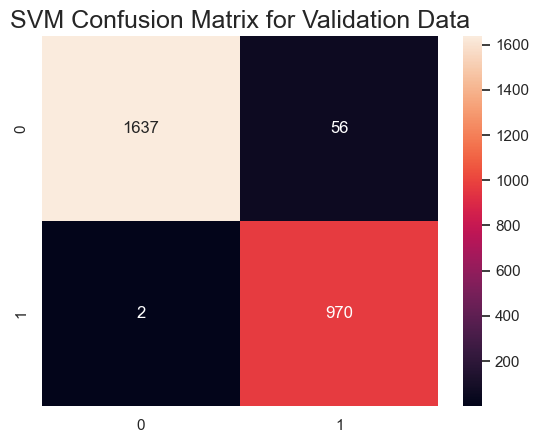

In [19]:
# svm model and confusion matrix 
svm_model = SVC()
svm_model.fit(X_train, y_train)
print("Accuracy for SVM on validation data: %{}".format(round((svm_model.score(X_validation, y_validation)*100),2)))
y_pred = svm_model.predict(X_validation)
plt.title("SVM Confusion Matrix for Validation Data", fontdict={'fontsize':18})
ax = sns.heatmap(confusion_matrix(y_validation, y_pred), annot=True, fmt="d")

In [20]:
# other models
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
import lightgbm as lgb

Accuracy for Random Forest on validation data: %95.16


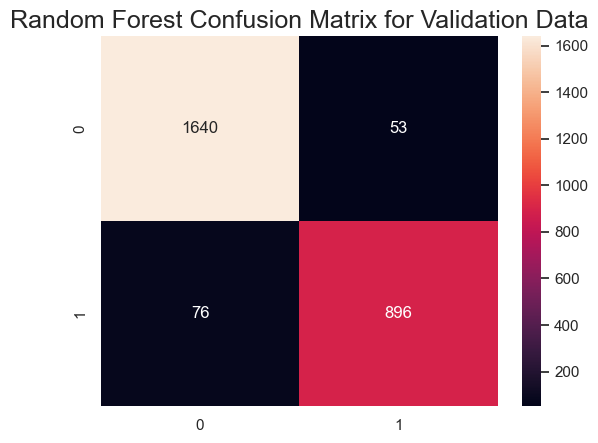

In [21]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train,y_train)
print("Accuracy for Random Forest on validation data: %{}".format(round((rf_model.score(X_validation, y_validation)*100),2)))
y_pred = rf_model.predict(X_validation)
plt.title("Random Forest Confusion Matrix for Validation Data", fontdict={'fontsize':18})
ax = sns.heatmap(confusion_matrix(y_validation, y_pred), annot=True, fmt="d")

Accuracy for Decision Tree on validation data: %91.41


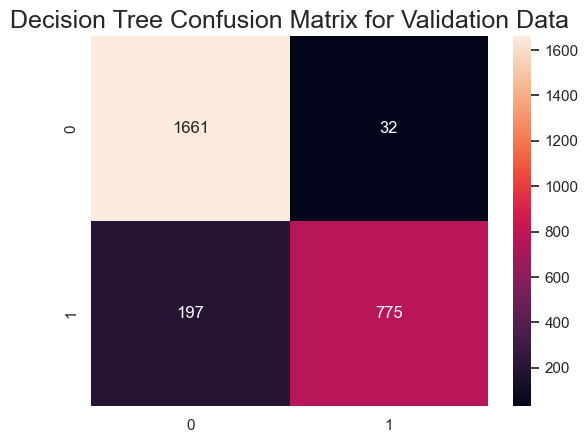

In [22]:
dct_model = DecisionTreeClassifier()
dct_model.fit(X_train,y_train)
print("Accuracy for Decision Tree on validation data: %{}".format(round((dct_model.score(X_validation, y_validation)*100),2)))
y_pred = dct_model.predict(X_validation)
plt.title("Decision Tree Confusion Matrix for Validation Data", fontdict={'fontsize':18})
ax = sns.heatmap(confusion_matrix(y_validation, y_pred), annot=True, fmt="d")

Accuracy for SGD on validation data: %97.9


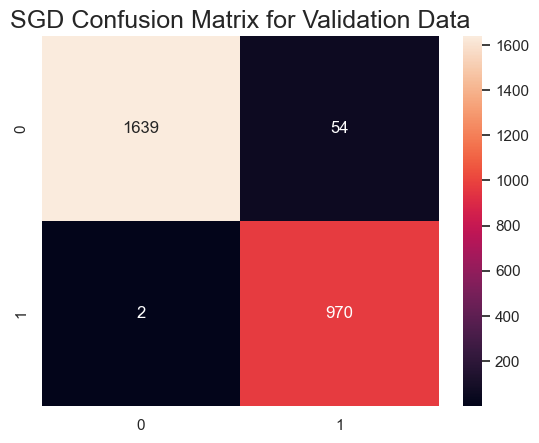

In [23]:
sgd_model = SGDClassifier()
sgd_model.fit(X_train,y_train)
print("Accuracy for SGD on validation data: %{}".format(round((sgd_model.score(X_validation, y_validation)*100),2)))
y_pred = sgd_model.predict(X_validation)
plt.title("SGD Confusion Matrix for Validation Data", fontdict={'fontsize':18})
ax = sns.heatmap(confusion_matrix(y_validation, y_pred), annot=True, fmt="d")

Accuracy for AdaBoost on validation data: %97.11


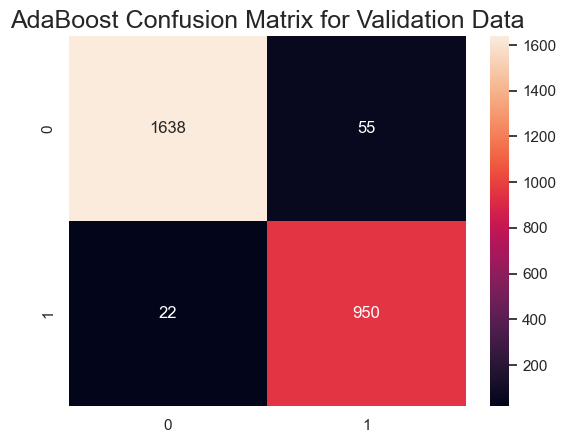

In [24]:
ada_model = AdaBoostClassifier()
ada_model.fit(X_train,y_train)
print("Accuracy for AdaBoost on validation data: %{}".format(round((ada_model.score(X_validation, y_validation)*100),2)))
y_pred = ada_model.predict(X_validation)
plt.title("AdaBoost Confusion Matrix for Validation Data", fontdict={'fontsize':18})
ax = sns.heatmap(confusion_matrix(y_validation, y_pred), annot=True, fmt="d")

Accuracy for XGBoost on validation data: %94.33


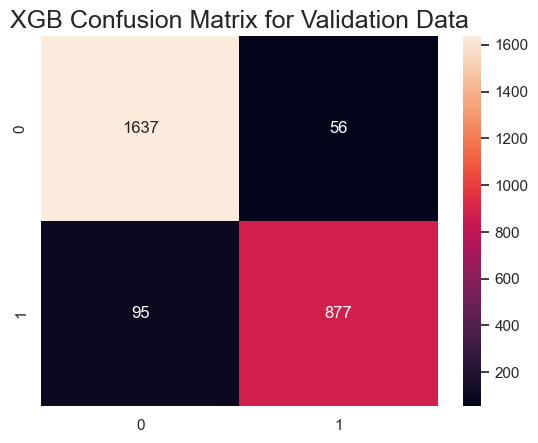

In [25]:
xgb_model = XGBClassifier()
xgb_model.fit(X_train,y_train)
print("Accuracy for XGBoost on validation data: %{}".format(round((xgb_model.score(X_validation, y_validation)*100),2)))
y_pred = xgb_model.predict(X_validation)
plt.title("XGB Confusion Matrix for Validation Data", fontdict={'fontsize':18})
ax = sns.heatmap(confusion_matrix(y_validation, y_pred), annot=True, fmt="d")

Learning rate set to 0.025225
0:	learn: 0.6213371	total: 52.7ms	remaining: 52.6s
1:	learn: 0.5540302	total: 55.6ms	remaining: 27.8s
2:	learn: 0.4940460	total: 58.3ms	remaining: 19.4s
3:	learn: 0.4425117	total: 61.1ms	remaining: 15.2s
4:	learn: 0.3937830	total: 63.7ms	remaining: 12.7s
5:	learn: 0.3515430	total: 66.5ms	remaining: 11s
6:	learn: 0.3153190	total: 69.1ms	remaining: 9.8s
7:	learn: 0.2825800	total: 71.8ms	remaining: 8.91s
8:	learn: 0.2531681	total: 74.2ms	remaining: 8.17s
9:	learn: 0.2300646	total: 77ms	remaining: 7.63s
10:	learn: 0.2089911	total: 79.1ms	remaining: 7.11s
11:	learn: 0.1923963	total: 82ms	remaining: 6.75s
12:	learn: 0.1746070	total: 84.8ms	remaining: 6.43s
13:	learn: 0.1586792	total: 87.8ms	remaining: 6.18s
14:	learn: 0.1464288	total: 90.6ms	remaining: 5.95s
15:	learn: 0.1370764	total: 93.3ms	remaining: 5.74s
16:	learn: 0.1265270	total: 96.4ms	remaining: 5.58s
17:	learn: 0.1173497	total: 100ms	remaining: 5.48s
18:	learn: 0.1089976	total: 104ms	remaining: 5.37s
1

177:	learn: 0.0132349	total: 569ms	remaining: 2.63s
178:	learn: 0.0132146	total: 571ms	remaining: 2.62s
179:	learn: 0.0131949	total: 574ms	remaining: 2.61s
180:	learn: 0.0131694	total: 576ms	remaining: 2.61s
181:	learn: 0.0131502	total: 579ms	remaining: 2.6s
182:	learn: 0.0130564	total: 581ms	remaining: 2.59s
183:	learn: 0.0129974	total: 584ms	remaining: 2.59s
184:	learn: 0.0129560	total: 586ms	remaining: 2.58s
185:	learn: 0.0129340	total: 589ms	remaining: 2.58s
186:	learn: 0.0128791	total: 592ms	remaining: 2.57s
187:	learn: 0.0128631	total: 594ms	remaining: 2.56s
188:	learn: 0.0128237	total: 597ms	remaining: 2.56s
189:	learn: 0.0127498	total: 599ms	remaining: 2.55s
190:	learn: 0.0127333	total: 603ms	remaining: 2.55s
191:	learn: 0.0126897	total: 606ms	remaining: 2.55s
192:	learn: 0.0126381	total: 609ms	remaining: 2.54s
193:	learn: 0.0125786	total: 612ms	remaining: 2.54s
194:	learn: 0.0125267	total: 615ms	remaining: 2.54s
195:	learn: 0.0124940	total: 618ms	remaining: 2.54s
196:	learn: 0

339:	learn: 0.0085848	total: 1.01s	remaining: 1.97s
340:	learn: 0.0085594	total: 1.01s	remaining: 1.96s
341:	learn: 0.0085145	total: 1.02s	remaining: 1.96s
342:	learn: 0.0084968	total: 1.02s	remaining: 1.95s
343:	learn: 0.0084688	total: 1.02s	remaining: 1.95s
344:	learn: 0.0084551	total: 1.02s	remaining: 1.95s
345:	learn: 0.0084461	total: 1.03s	remaining: 1.94s
346:	learn: 0.0084349	total: 1.03s	remaining: 1.94s
347:	learn: 0.0084147	total: 1.03s	remaining: 1.93s
348:	learn: 0.0083910	total: 1.03s	remaining: 1.93s
349:	learn: 0.0083822	total: 1.04s	remaining: 1.93s
350:	learn: 0.0083628	total: 1.04s	remaining: 1.92s
351:	learn: 0.0083450	total: 1.04s	remaining: 1.92s
352:	learn: 0.0083368	total: 1.04s	remaining: 1.91s
353:	learn: 0.0083277	total: 1.05s	remaining: 1.91s
354:	learn: 0.0083070	total: 1.05s	remaining: 1.91s
355:	learn: 0.0082983	total: 1.05s	remaining: 1.9s
356:	learn: 0.0082789	total: 1.05s	remaining: 1.9s
357:	learn: 0.0082313	total: 1.06s	remaining: 1.9s
358:	learn: 0.0

535:	learn: 0.0055229	total: 1.54s	remaining: 1.34s
536:	learn: 0.0055197	total: 1.55s	remaining: 1.33s
537:	learn: 0.0055152	total: 1.55s	remaining: 1.33s
538:	learn: 0.0055102	total: 1.55s	remaining: 1.33s
539:	learn: 0.0054941	total: 1.56s	remaining: 1.33s
540:	learn: 0.0054912	total: 1.56s	remaining: 1.32s
541:	learn: 0.0054756	total: 1.56s	remaining: 1.32s
542:	learn: 0.0054708	total: 1.56s	remaining: 1.32s
543:	learn: 0.0054563	total: 1.57s	remaining: 1.31s
544:	learn: 0.0054472	total: 1.57s	remaining: 1.31s
545:	learn: 0.0054356	total: 1.57s	remaining: 1.31s
546:	learn: 0.0054200	total: 1.58s	remaining: 1.31s
547:	learn: 0.0054172	total: 1.58s	remaining: 1.3s
548:	learn: 0.0054136	total: 1.58s	remaining: 1.3s
549:	learn: 0.0054106	total: 1.59s	remaining: 1.3s
550:	learn: 0.0054106	total: 1.59s	remaining: 1.29s
551:	learn: 0.0053964	total: 1.59s	remaining: 1.29s
552:	learn: 0.0053834	total: 1.59s	remaining: 1.29s
553:	learn: 0.0053788	total: 1.6s	remaining: 1.28s
554:	learn: 0.00

744:	learn: 0.0040611	total: 2.13s	remaining: 730ms
745:	learn: 0.0040555	total: 2.13s	remaining: 727ms
746:	learn: 0.0040480	total: 2.14s	remaining: 724ms
747:	learn: 0.0040418	total: 2.14s	remaining: 721ms
748:	learn: 0.0040363	total: 2.14s	remaining: 718ms
749:	learn: 0.0040308	total: 2.15s	remaining: 715ms
750:	learn: 0.0040293	total: 2.15s	remaining: 713ms
751:	learn: 0.0040223	total: 2.15s	remaining: 710ms
752:	learn: 0.0040208	total: 2.15s	remaining: 707ms
753:	learn: 0.0040136	total: 2.16s	remaining: 704ms
754:	learn: 0.0040082	total: 2.16s	remaining: 701ms
755:	learn: 0.0040028	total: 2.16s	remaining: 698ms
756:	learn: 0.0039942	total: 2.17s	remaining: 695ms
757:	learn: 0.0039927	total: 2.17s	remaining: 692ms
758:	learn: 0.0039912	total: 2.17s	remaining: 689ms
759:	learn: 0.0039898	total: 2.17s	remaining: 686ms
760:	learn: 0.0039846	total: 2.18s	remaining: 684ms
761:	learn: 0.0039831	total: 2.18s	remaining: 681ms
762:	learn: 0.0039817	total: 2.18s	remaining: 678ms
763:	learn: 

905:	learn: 0.0035991	total: 2.52s	remaining: 261ms
906:	learn: 0.0035991	total: 2.52s	remaining: 258ms
907:	learn: 0.0035991	total: 2.52s	remaining: 255ms
908:	learn: 0.0035991	total: 2.52s	remaining: 252ms
909:	learn: 0.0035991	total: 2.52s	remaining: 250ms
910:	learn: 0.0035991	total: 2.53s	remaining: 247ms
911:	learn: 0.0035991	total: 2.53s	remaining: 244ms
912:	learn: 0.0035991	total: 2.53s	remaining: 241ms
913:	learn: 0.0035991	total: 2.53s	remaining: 238ms
914:	learn: 0.0035991	total: 2.54s	remaining: 235ms
915:	learn: 0.0035991	total: 2.54s	remaining: 233ms
916:	learn: 0.0035991	total: 2.54s	remaining: 230ms
917:	learn: 0.0035991	total: 2.54s	remaining: 227ms
918:	learn: 0.0035991	total: 2.54s	remaining: 224ms
919:	learn: 0.0035991	total: 2.54s	remaining: 221ms
920:	learn: 0.0035991	total: 2.55s	remaining: 218ms
921:	learn: 0.0035991	total: 2.55s	remaining: 216ms
922:	learn: 0.0035991	total: 2.55s	remaining: 213ms
923:	learn: 0.0035991	total: 2.55s	remaining: 210ms
924:	learn: 

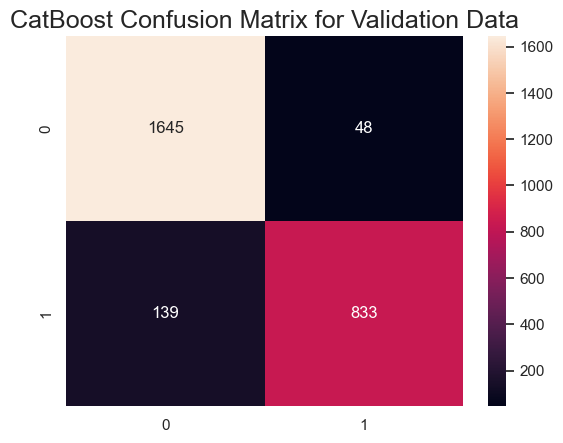

In [26]:
cat_model = CatBoostClassifier()
cat_model.fit(X_train,y_train)
print("Accuracy for CatBoost on validation data: %{}".format(round((cat_model.score(X_validation, y_validation)*100),2)))
y_pred = cat_model.predict(X_validation)
plt.title("CatBoost Confusion Matrix for Validation Data", fontdict={'fontsize':18})
ax = sns.heatmap(confusion_matrix(y_validation, y_pred), annot=True, fmt="d")

Accuracy for LGB  on validation data: %94.18


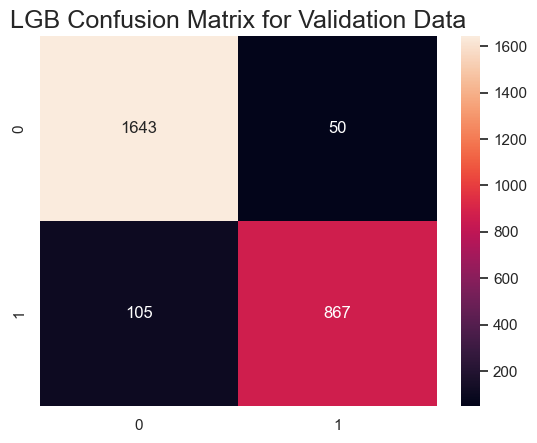

In [27]:
lgb_model = lgb.LGBMClassifier()
lgb_model.fit(X_train,y_train)
print("Accuracy for LGB  on validation data: %{}".format(round((lgb_model.score(X_validation, y_validation)*100),2)))
y_pred = lgb_model.predict(X_validation)
plt.title("LGB Confusion Matrix for Validation Data", fontdict={'fontsize':18})
ax = sns.heatmap(confusion_matrix(y_validation, y_pred), annot=True, fmt="d")

In [28]:
# NN without regularization
model1 = Sequential()
model1.add(Dense(6, activation='relu', input_dim=6))
model1.add(Dense(1, activation='sigmoid'))
model1.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
history1 = model1.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_validation, y_validation))

Epoch 1/50
255/255 [==============================] - 1s 1ms/step - loss: 0.6064 - accuracy: 0.7415 - val_loss: 0.6207 - val_accuracy: 0.6353
Epoch 2/50
255/255 [==============================] - 0s 1ms/step - loss: 0.4815 - accuracy: 0.7877 - val_loss: 0.5663 - val_accuracy: 0.6353
Epoch 3/50
255/255 [==============================] - 0s 1ms/step - loss: 0.4026 - accuracy: 0.7877 - val_loss: 0.5106 - val_accuracy: 0.6353
Epoch 4/50
255/255 [==============================] - 0s 974us/step - loss: 0.3444 - accuracy: 0.7877 - val_loss: 0.4530 - val_accuracy: 0.6353
Epoch 5/50
255/255 [==============================] - 0s 1ms/step - loss: 0.2922 - accuracy: 0.7877 - val_loss: 0.3911 - val_accuracy: 0.6353
Epoch 6/50
255/255 [==============================] - 0s 1ms/step - loss: 0.2474 - accuracy: 0.7877 - val_loss: 0.3377 - val_accuracy: 0.6353
Epoch 7/50
255/255 [==============================] - 0s 1ms/step - loss: 0.2120 - accuracy: 0.9018 - val_loss: 0.2903 - val_accuracy: 0.8743
Epoc

In [29]:
# NN with 0.2 dropout ratio before the hidden layer.
model2 = Sequential()
model2.add(Dense(6, activation='relu', input_dim=6))
model2.add(Dropout(0.2))
model2.add(Dense(1, activation='sigmoid'))
model2.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
history2 = model2.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_validation, y_validation))

Epoch 1/50
255/255 [==============================] - 1s 1ms/step - loss: 0.6083 - accuracy: 0.7383 - val_loss: 0.5304 - val_accuracy: 0.6904
Epoch 2/50
255/255 [==============================] - 0s 992us/step - loss: 0.4347 - accuracy: 0.8837 - val_loss: 0.3549 - val_accuracy: 0.9467
Epoch 3/50
255/255 [==============================] - 0s 1ms/step - loss: 0.3105 - accuracy: 0.9161 - val_loss: 0.2363 - val_accuracy: 0.9460
Epoch 4/50
255/255 [==============================] - 0s 1ms/step - loss: 0.2265 - accuracy: 0.9407 - val_loss: 0.1728 - val_accuracy: 0.9475
Epoch 5/50
255/255 [==============================] - 0s 984us/step - loss: 0.1803 - accuracy: 0.9508 - val_loss: 0.1307 - val_accuracy: 0.9572
Epoch 6/50
255/255 [==============================] - 0s 983us/step - loss: 0.1461 - accuracy: 0.9571 - val_loss: 0.1171 - val_accuracy: 0.9546
Epoch 7/50
255/255 [==============================] - 0s 1000us/step - loss: 0.1353 - accuracy: 0.9579 - val_loss: 0.1072 - val_accuracy: 0.95

In [30]:
# NN with L1(Lasso) regularization
model3 = Sequential()
model3.add(Dense(6, activation='relu', input_dim=6, kernel_regularizer=l1(l=0.01)))
model3.add(Dense(1, activation='sigmoid'))
model3.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
history3 = model3.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_validation, y_validation))

Epoch 1/50
255/255 [==============================] - 1s 1ms/step - loss: 0.6893 - accuracy: 0.7877 - val_loss: 0.6449 - val_accuracy: 0.6353
Epoch 2/50
255/255 [==============================] - 0s 954us/step - loss: 0.4904 - accuracy: 0.8028 - val_loss: 0.4698 - val_accuracy: 0.7614
Epoch 3/50
255/255 [==============================] - 0s 953us/step - loss: 0.3700 - accuracy: 0.9201 - val_loss: 0.3560 - val_accuracy: 0.9280
Epoch 4/50
255/255 [==============================] - 0s 964us/step - loss: 0.2987 - accuracy: 0.9614 - val_loss: 0.2812 - val_accuracy: 0.9430
Epoch 5/50
255/255 [==============================] - 0s 959us/step - loss: 0.2567 - accuracy: 0.9678 - val_loss: 0.2594 - val_accuracy: 0.9355
Epoch 6/50
255/255 [==============================] - 0s 955us/step - loss: 0.2323 - accuracy: 0.9672 - val_loss: 0.2331 - val_accuracy: 0.9460
Epoch 7/50
255/255 [==============================] - 0s 950us/step - loss: 0.2171 - accuracy: 0.9704 - val_loss: 0.2226 - val_accuracy: 0

In [31]:
# NN with L2(Ridge) Regularization
model4 = Sequential()
model4.add(Dense(6, activation='relu', input_dim=6, kernel_regularizer=l2(l=0.01)))
model4.add(Dense(1, activation='sigmoid'))
model4.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
history4 = model4.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_validation, y_validation))

Epoch 1/50
255/255 [==============================] - 1s 1ms/step - loss: 0.6040 - accuracy: 0.7805 - val_loss: 0.5997 - val_accuracy: 0.6353
Epoch 2/50
255/255 [==============================] - 0s 964us/step - loss: 0.4261 - accuracy: 0.7877 - val_loss: 0.4866 - val_accuracy: 0.6353
Epoch 3/50
255/255 [==============================] - 0s 959us/step - loss: 0.3370 - accuracy: 0.7877 - val_loss: 0.4215 - val_accuracy: 0.6353
Epoch 4/50
255/255 [==============================] - 0s 1ms/step - loss: 0.2858 - accuracy: 0.7985 - val_loss: 0.3623 - val_accuracy: 0.7876
Epoch 5/50
255/255 [==============================] - 0s 1ms/step - loss: 0.2505 - accuracy: 0.9294 - val_loss: 0.3214 - val_accuracy: 0.9088
Epoch 6/50
255/255 [==============================] - 0s 985us/step - loss: 0.2252 - accuracy: 0.9516 - val_loss: 0.2860 - val_accuracy: 0.9212
Epoch 7/50
255/255 [==============================] - 0s 1ms/step - loss: 0.2052 - accuracy: 0.9587 - val_loss: 0.2617 - val_accuracy: 0.9253


In [32]:
# plotting with loss and val_loss
loss1 = history1.history['loss']
val_loss1 = history1.history['val_loss']
loss2 = history2.history['loss']
val_loss2 = history2.history['val_loss']
loss3 = history3.history['loss']
val_loss3 = history3.history['val_loss']
loss4 = history4.history['loss']
val_loss4 = history4.history['val_loss']


fig = go.Figure()
fig.add_trace(go.Scatter(x=np.arange(len(loss1)), y=loss1,
                    name='Training Loss without Regularization', line=dict(color='royalblue')))
fig.add_trace(go.Scatter(x=np.arange(len(val_loss1)), y=val_loss1,
                    name='Validation Loss without Regularization', line = dict(color='firebrick')))

fig.add_trace(go.Scatter(x=np.arange(len(loss2)), y=loss2,
                    name='Training Loss with Dropout', line=dict(color='royalblue', dash='dash')))
fig.add_trace(go.Scatter(x=np.arange(len(val_loss2)), y=val_loss2,
                    name='Validation Loss with Dropout', line = dict(color='firebrick', dash='dash')))

fig.add_trace(go.Scatter(x=np.arange(len(loss3)), y=loss3,
                    name='Training Loss with L1 Regularization', line=dict(color='royalblue', dash='dot')))
fig.add_trace(go.Scatter(x=np.arange(len(val_loss3)), y=val_loss3,
                    name='Validation Loss with L1 Regularization', line = dict(color='firebrick', dash='dot')))

fig.add_trace(go.Scatter(x=np.arange(len(loss4)), y=loss4,
                    name='Training Loss with L2 Regularization', line=dict(color='royalblue', dash='longdashdot')))
fig.add_trace(go.Scatter(x=np.arange(len(val_loss4)), y=val_loss4,
                    name='Validation Loss with L2 Regularization', line = dict(color='firebrick', dash='longdashdot')))


fig.update_layout(xaxis_title='Epochs',
                  yaxis_title='Loss',
                  title={'text': "Training and Validation Losses for Different Models",
                                                'x':0.5,
                                                'xanchor': 'center',
                                                'yanchor': 'top'})
iplot(fig)

In [33]:
# best model
model = Sequential()
model.add(Dense(6, activation='relu', input_dim=6, kernel_regularizer=l2(l=0.01)))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
                loss='binary_crossentropy',
                metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=50, batch_size=32)

Epoch 1/50
255/255 [==============================] - 0s 705us/step - loss: 0.6344 - accuracy: 0.7481
Epoch 2/50
255/255 [==============================] - 0s 701us/step - loss: 0.4452 - accuracy: 0.8221
Epoch 3/50
255/255 [==============================] - 0s 681us/step - loss: 0.3236 - accuracy: 0.9594
Epoch 4/50
255/255 [==============================] - 0s 697us/step - loss: 0.2523 - accuracy: 0.9646
Epoch 5/50
255/255 [==============================] - 0s 735us/step - loss: 0.2156 - accuracy: 0.9635
Epoch 6/50
255/255 [==============================] - 0s 731us/step - loss: 0.1947 - accuracy: 0.9639
Epoch 7/50
255/255 [==============================] - 0s 704us/step - loss: 0.1821 - accuracy: 0.9635
Epoch 8/50
255/255 [==============================] - 0s 694us/step - loss: 0.1728 - accuracy: 0.9646
Epoch 9/50
255/255 [==============================] - 0s 691us/step - loss: 0.1655 - accuracy: 0.9659
Epoch 10/50
255/255 [==============================] - 0s 708us/step - loss: 0.159

In [34]:
#define variables for cnn (because of parameters)
X_train_cnn = X_train.iloc[:,:].values
X_validation_cnn = X_validation.iloc[:,:].values
X_test_cnn = X_test.iloc[:,:] .values

In [35]:
X_train_cnn = X_train_cnn.reshape(-1,6,1)
X_validation_cnn = X_validation_cnn.reshape(-1,6,1)
X_test_cnn = X_test_cnn.reshape(-1,6,1)

In [36]:
from keras.layers import LSTM
from keras.optimizers import Adam

# Define the parameters
batch_sizes = [32, 64, 128]
dropout_rates = [0.2, 0.3, 0.5]
learning_rates = [0.001, 0.0001]
model_lstms = []
# Create and fit the LSTM network

for batch_size in batch_sizes:
    for dropout_rate in dropout_rates:
        for learning_rate in learning_rates:             
            model_lstm = Sequential()
            model_lstm.add(LSTM(64, input_shape=(6, 1)))
            model_lstm.add(Dense(1))
            model_lstm.add(Dropout(dropout_rate))
            model_lstm.compile(loss='mean_squared_error', optimizer=Adam(lr=learning_rate), metrics=['accuracy'])
            model_lstm.fit(X_train_cnn, y_train, epochs=30, batch_size=batch_size, verbose=2)
            print("-----------------------------------------------------------------------------")

            model_lstms.append(model_lstm)
                

Epoch 1/30


c:\users\asus\appdata\local\programs\python\python37\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning:

The `lr` argument is deprecated, use `learning_rate` instead.



255/255 - 2s - loss: 0.1097 - accuracy: 0.8668 - 2s/epoch - 7ms/step
Epoch 2/30
255/255 - 1s - loss: 0.0999 - accuracy: 0.8837 - 570ms/epoch - 2ms/step
Epoch 3/30
255/255 - 1s - loss: 0.0868 - accuracy: 0.9022 - 561ms/epoch - 2ms/step
Epoch 4/30
255/255 - 1s - loss: 0.0784 - accuracy: 0.9160 - 548ms/epoch - 2ms/step
Epoch 5/30
255/255 - 1s - loss: 0.0699 - accuracy: 0.9283 - 557ms/epoch - 2ms/step
Epoch 6/30
255/255 - 1s - loss: 0.0571 - accuracy: 0.9440 - 560ms/epoch - 2ms/step
Epoch 7/30
255/255 - 1s - loss: 0.0570 - accuracy: 0.9451 - 552ms/epoch - 2ms/step
Epoch 8/30
255/255 - 1s - loss: 0.0571 - accuracy: 0.9449 - 551ms/epoch - 2ms/step
Epoch 9/30
255/255 - 1s - loss: 0.0578 - accuracy: 0.9450 - 558ms/epoch - 2ms/step
Epoch 10/30
255/255 - 1s - loss: 0.0529 - accuracy: 0.9489 - 548ms/epoch - 2ms/step
Epoch 11/30
255/255 - 1s - loss: 0.0562 - accuracy: 0.9458 - 558ms/epoch - 2ms/step
Epoch 12/30
255/255 - 1s - loss: 0.0554 - accuracy: 0.9460 - 558ms/epoch - 2ms/step
Epoch 13/30
255

Epoch 7/30
255/255 - 1s - loss: 0.1138 - accuracy: 0.8631 - 541ms/epoch - 2ms/step
Epoch 8/30
255/255 - 1s - loss: 0.1149 - accuracy: 0.8629 - 548ms/epoch - 2ms/step
Epoch 9/30
255/255 - 1s - loss: 0.1149 - accuracy: 0.8644 - 546ms/epoch - 2ms/step
Epoch 10/30
255/255 - 1s - loss: 0.1153 - accuracy: 0.8652 - 550ms/epoch - 2ms/step
Epoch 11/30
255/255 - 1s - loss: 0.1181 - accuracy: 0.8628 - 547ms/epoch - 2ms/step
Epoch 12/30
255/255 - 1s - loss: 0.1172 - accuracy: 0.8659 - 549ms/epoch - 2ms/step
Epoch 13/30
255/255 - 1s - loss: 0.1091 - accuracy: 0.8754 - 553ms/epoch - 2ms/step
Epoch 14/30
255/255 - 1s - loss: 0.1157 - accuracy: 0.8722 - 543ms/epoch - 2ms/step
Epoch 15/30
255/255 - 1s - loss: 0.1154 - accuracy: 0.8718 - 547ms/epoch - 2ms/step
Epoch 16/30
255/255 - 1s - loss: 0.1130 - accuracy: 0.8750 - 549ms/epoch - 2ms/step
Epoch 17/30
255/255 - 1s - loss: 0.1124 - accuracy: 0.8801 - 545ms/epoch - 2ms/step
Epoch 18/30
255/255 - 1s - loss: 0.1076 - accuracy: 0.8835 - 543ms/epoch - 2ms/

Epoch 13/30
128/128 - 0s - loss: 0.0526 - accuracy: 0.9501 - 339ms/epoch - 3ms/step
Epoch 14/30
128/128 - 0s - loss: 0.0559 - accuracy: 0.9468 - 332ms/epoch - 3ms/step
Epoch 15/30
128/128 - 0s - loss: 0.0538 - accuracy: 0.9478 - 331ms/epoch - 3ms/step
Epoch 16/30
128/128 - 0s - loss: 0.0536 - accuracy: 0.9483 - 333ms/epoch - 3ms/step
Epoch 17/30
128/128 - 0s - loss: 0.0563 - accuracy: 0.9458 - 329ms/epoch - 3ms/step
Epoch 18/30
128/128 - 0s - loss: 0.0535 - accuracy: 0.9478 - 336ms/epoch - 3ms/step
Epoch 19/30
128/128 - 0s - loss: 0.0555 - accuracy: 0.9462 - 325ms/epoch - 3ms/step
Epoch 20/30
128/128 - 0s - loss: 0.0551 - accuracy: 0.9461 - 332ms/epoch - 3ms/step
Epoch 21/30
128/128 - 0s - loss: 0.0565 - accuracy: 0.9449 - 327ms/epoch - 3ms/step
Epoch 22/30
128/128 - 0s - loss: 0.0536 - accuracy: 0.9468 - 329ms/epoch - 3ms/step
Epoch 23/30
128/128 - 0s - loss: 0.0515 - accuracy: 0.9492 - 331ms/epoch - 3ms/step
Epoch 24/30
128/128 - 0s - loss: 0.0536 - accuracy: 0.9477 - 331ms/epoch - 3

128/128 - 0s - loss: 0.1129 - accuracy: 0.8702 - 319ms/epoch - 2ms/step
Epoch 19/30
128/128 - 0s - loss: 0.1169 - accuracy: 0.8677 - 322ms/epoch - 3ms/step
Epoch 20/30
128/128 - 0s - loss: 0.1125 - accuracy: 0.8720 - 318ms/epoch - 2ms/step
Epoch 21/30
128/128 - 0s - loss: 0.1138 - accuracy: 0.8733 - 329ms/epoch - 3ms/step
Epoch 22/30
128/128 - 0s - loss: 0.1100 - accuracy: 0.8792 - 324ms/epoch - 3ms/step
Epoch 23/30
128/128 - 0s - loss: 0.1151 - accuracy: 0.8750 - 319ms/epoch - 2ms/step
Epoch 24/30
128/128 - 0s - loss: 0.1126 - accuracy: 0.8768 - 322ms/epoch - 3ms/step
Epoch 25/30
128/128 - 0s - loss: 0.1126 - accuracy: 0.8785 - 324ms/epoch - 3ms/step
Epoch 26/30
128/128 - 0s - loss: 0.1124 - accuracy: 0.8817 - 322ms/epoch - 3ms/step
Epoch 27/30
128/128 - 0s - loss: 0.1100 - accuracy: 0.8828 - 326ms/epoch - 3ms/step
Epoch 28/30
128/128 - 0s - loss: 0.1077 - accuracy: 0.8880 - 325ms/epoch - 3ms/step
Epoch 29/30
128/128 - 0s - loss: 0.1075 - accuracy: 0.8860 - 321ms/epoch - 3ms/step
Epoc

Epoch 24/30
64/64 - 0s - loss: 0.0579 - accuracy: 0.9442 - 243ms/epoch - 4ms/step
Epoch 25/30
64/64 - 0s - loss: 0.0547 - accuracy: 0.9469 - 242ms/epoch - 4ms/step
Epoch 26/30
64/64 - 0s - loss: 0.0538 - accuracy: 0.9489 - 236ms/epoch - 4ms/step
Epoch 27/30
64/64 - 0s - loss: 0.0533 - accuracy: 0.9487 - 237ms/epoch - 4ms/step
Epoch 28/30
64/64 - 0s - loss: 0.0546 - accuracy: 0.9467 - 221ms/epoch - 3ms/step
Epoch 29/30
64/64 - 0s - loss: 0.0535 - accuracy: 0.9482 - 222ms/epoch - 3ms/step
Epoch 30/30
64/64 - 0s - loss: 0.0517 - accuracy: 0.9504 - 229ms/epoch - 4ms/step
-----------------------------------------------------------------------------
Epoch 1/30
64/64 - 1s - loss: 0.2170 - accuracy: 0.7877 - 1s/epoch - 22ms/step
Epoch 2/30
64/64 - 0s - loss: 0.1668 - accuracy: 0.7877 - 232ms/epoch - 4ms/step
Epoch 3/30
64/64 - 0s - loss: 0.1499 - accuracy: 0.7943 - 229ms/epoch - 4ms/step
Epoch 4/30
64/64 - 0s - loss: 0.1368 - accuracy: 0.8133 - 224ms/epoch - 3ms/step
Epoch 5/30
64/64 - 0s - lo

64/64 - 1s - loss: 0.1594 - accuracy: 0.8262 - 1s/epoch - 21ms/step
Epoch 2/30
64/64 - 0s - loss: 0.1439 - accuracy: 0.8410 - 196ms/epoch - 3ms/step
Epoch 3/30
64/64 - 0s - loss: 0.1440 - accuracy: 0.8416 - 194ms/epoch - 3ms/step
Epoch 4/30
64/64 - 0s - loss: 0.1451 - accuracy: 0.8429 - 189ms/epoch - 3ms/step
Epoch 5/30
64/64 - 0s - loss: 0.1372 - accuracy: 0.8558 - 196ms/epoch - 3ms/step
Epoch 6/30
64/64 - 0s - loss: 0.1388 - accuracy: 0.8535 - 192ms/epoch - 3ms/step
Epoch 7/30
64/64 - 0s - loss: 0.1383 - accuracy: 0.8553 - 193ms/epoch - 3ms/step
Epoch 8/30
64/64 - 0s - loss: 0.1358 - accuracy: 0.8607 - 198ms/epoch - 3ms/step
Epoch 9/30
64/64 - 0s - loss: 0.1300 - accuracy: 0.8647 - 192ms/epoch - 3ms/step
Epoch 10/30
64/64 - 0s - loss: 0.1344 - accuracy: 0.8621 - 198ms/epoch - 3ms/step
Epoch 11/30
64/64 - 0s - loss: 0.1308 - accuracy: 0.8665 - 191ms/epoch - 3ms/step
Epoch 12/30
64/64 - 0s - loss: 0.1230 - accuracy: 0.8755 - 210ms/epoch - 3ms/step
Epoch 13/30
64/64 - 0s - loss: 0.1224 

In [37]:
counter = 0
results_table_lstm = []
for batch_size in batch_sizes:
    for dropout_rate in dropout_rates:
        for learning_rate in learning_rates:
            # Predict on the validation set
            y_pred = model_lstms[counter].predict(X_validation_cnn)

            # Convert predictions to binary values based on a threshold
            threshold = 0.5
            y_pred_binary = np.where(y_pred >= threshold, 1, 0)

            # Calculate the F2 score
            f2_score = fbeta_score(y_validation, y_pred_binary, beta=2)
            # Store the results in the table
            results_table_lstm.append((batch_size, dropout_rate, learning_rate, f2_score))
            counter+=1

84/84 [==============================] - 0s 1ms/step


In [38]:
# Print the results table
print("Batch Size | Dropout Rate | Learning Rate | F2 Score")
print("-----------------------------------------------")
for row in results_table_lstm:
    print("{:^11} | {:^13} | {:^13} | {:^8.4f}".format(row[0], row[1], row[2], row[3]))

Batch Size | Dropout Rate | Learning Rate | F2 Score
-----------------------------------------------
    32      |      0.2      |     0.001     |  0.7372 
    32      |      0.2      |    0.0001     |  0.8860 
    32      |      0.3      |     0.001     |  0.9341 
    32      |      0.3      |    0.0001     |  0.8148 
    32      |      0.5      |     0.001     |  0.0000 
    32      |      0.5      |    0.0001     |  0.0026 
    64      |      0.2      |     0.001     |  0.9759 
    64      |      0.2      |    0.0001     |  0.8280 
    64      |      0.3      |     0.001     |  0.8903 
    64      |      0.3      |    0.0001     |  0.7898 
    64      |      0.5      |     0.001     |  0.3622 
    64      |      0.5      |    0.0001     |  0.4064 
    128     |      0.2      |     0.001     |  0.9592 
    128     |      0.2      |    0.0001     |  0.7683 
    128     |      0.3      |     0.001     |  0.8637 
    128     |      0.3      |    0.0001     |  0.6813 
    128     |      

In [39]:
max_f2_score = max(results_table_lstm, key=lambda x: x[3])
print("Batch Size | Dropout Rate | Learning Rate | F2 Score")
print("-----------------------------------------------")
print("BEST MODEL IS : {:^11} | {:^13} | {:^13} | {:^8.4f}".format(max_f2_score[0], max_f2_score[1], max_f2_score[2], max_f2_score[3]))
print("-----------------------------------------------")
print("BEST MODEL INDEX IS {}".format(results_table_lstm.index(max_f2_score)))

model_lstms[results_table_lstm.index(max_f2_score)].summary()

Batch Size | Dropout Rate | Learning Rate | F2 Score
-----------------------------------------------
BEST MODEL IS :     64      |      0.2      |     0.001     |  0.9759 
-----------------------------------------------
BEST MODEL INDEX IS 6
Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 64)                16896     
                                                                 
 dense_16 (Dense)            (None, 1)                 65        
                                                                 
 dropout_7 (Dropout)         (None, 1)                 0         
                                                                 
Total params: 16,961
Trainable params: 16,961
Non-trainable params: 0
_________________________________________________________________


In [40]:
from keras.layers import GRU
from keras.optimizers import Adam

# Define the parameters
batch_sizes = [32, 64, 128]
dropout_rates = [0.2, 0.3, 0.5]
learning_rates = [0.001, 0.0001]
model_grus = []
# Create and fit the LSTM network

for batch_size in batch_sizes:
    for dropout_rate in dropout_rates:
        for learning_rate in learning_rates:             
            model_gru = Sequential()
            model_gru.add(GRU(64, input_shape=(6, 1)))
            model_gru.add(Dense(1))
            model_gru.add(Dropout(dropout_rate))
            model_gru.compile(loss='mean_squared_error', optimizer=Adam(lr=learning_rate), metrics=['accuracy'])
            model_gru.fit(X_train_cnn, y_train, epochs=30, batch_size=batch_size, verbose=2)
            print("-----------------------------------------------------------------------------")


            model_grus.append(model_gru)

Epoch 1/30


c:\users\asus\appdata\local\programs\python\python37\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning:

The `lr` argument is deprecated, use `learning_rate` instead.



255/255 - 2s - loss: 0.1064 - accuracy: 0.8765 - 2s/epoch - 7ms/step
Epoch 2/30
255/255 - 1s - loss: 0.0808 - accuracy: 0.9162 - 712ms/epoch - 3ms/step
Epoch 3/30
255/255 - 1s - loss: 0.0617 - accuracy: 0.9407 - 718ms/epoch - 3ms/step
Epoch 4/30
255/255 - 1s - loss: 0.0578 - accuracy: 0.9442 - 743ms/epoch - 3ms/step
Epoch 5/30
255/255 - 1s - loss: 0.0577 - accuracy: 0.9455 - 702ms/epoch - 3ms/step
Epoch 6/30
255/255 - 1s - loss: 0.0592 - accuracy: 0.9431 - 606ms/epoch - 2ms/step
Epoch 7/30
255/255 - 1s - loss: 0.0535 - accuracy: 0.9485 - 544ms/epoch - 2ms/step
Epoch 8/30
255/255 - 1s - loss: 0.0553 - accuracy: 0.9467 - 684ms/epoch - 3ms/step
Epoch 9/30
255/255 - 1s - loss: 0.0520 - accuracy: 0.9504 - 621ms/epoch - 2ms/step
Epoch 10/30
255/255 - 1s - loss: 0.0536 - accuracy: 0.9484 - 588ms/epoch - 2ms/step
Epoch 11/30
255/255 - 1s - loss: 0.0529 - accuracy: 0.9482 - 578ms/epoch - 2ms/step
Epoch 12/30
255/255 - 1s - loss: 0.0525 - accuracy: 0.9494 - 598ms/epoch - 2ms/step
Epoch 13/30
255

Epoch 7/30
255/255 - 1s - loss: 0.1103 - accuracy: 0.8798 - 552ms/epoch - 2ms/step
Epoch 8/30
255/255 - 1s - loss: 0.1102 - accuracy: 0.8837 - 551ms/epoch - 2ms/step
Epoch 9/30
255/255 - 1s - loss: 0.1071 - accuracy: 0.8905 - 587ms/epoch - 2ms/step
Epoch 10/30
255/255 - 1s - loss: 0.1064 - accuracy: 0.8966 - 615ms/epoch - 2ms/step
Epoch 11/30
255/255 - 1s - loss: 0.1023 - accuracy: 0.9031 - 677ms/epoch - 3ms/step
Epoch 12/30
255/255 - 1s - loss: 0.0978 - accuracy: 0.9068 - 563ms/epoch - 2ms/step
Epoch 13/30
255/255 - 1s - loss: 0.0948 - accuracy: 0.9051 - 548ms/epoch - 2ms/step
Epoch 14/30
255/255 - 1s - loss: 0.0918 - accuracy: 0.9072 - 572ms/epoch - 2ms/step
Epoch 15/30
255/255 - 1s - loss: 0.0859 - accuracy: 0.9160 - 545ms/epoch - 2ms/step
Epoch 16/30
255/255 - 1s - loss: 0.0778 - accuracy: 0.9261 - 525ms/epoch - 2ms/step
Epoch 17/30
255/255 - 1s - loss: 0.0794 - accuracy: 0.9263 - 546ms/epoch - 2ms/step
Epoch 18/30
255/255 - 1s - loss: 0.0778 - accuracy: 0.9271 - 520ms/epoch - 2ms/

Epoch 13/30
128/128 - 0s - loss: 0.0582 - accuracy: 0.9440 - 355ms/epoch - 3ms/step
Epoch 14/30
128/128 - 0s - loss: 0.0552 - accuracy: 0.9468 - 319ms/epoch - 2ms/step
Epoch 15/30
128/128 - 0s - loss: 0.0568 - accuracy: 0.9460 - 323ms/epoch - 3ms/step
Epoch 16/30
128/128 - 0s - loss: 0.0529 - accuracy: 0.9487 - 319ms/epoch - 2ms/step
Epoch 17/30
128/128 - 0s - loss: 0.0512 - accuracy: 0.9515 - 361ms/epoch - 3ms/step
Epoch 18/30
128/128 - 0s - loss: 0.0584 - accuracy: 0.9430 - 357ms/epoch - 3ms/step
Epoch 19/30
128/128 - 0s - loss: 0.0558 - accuracy: 0.9460 - 366ms/epoch - 3ms/step
Epoch 20/30
128/128 - 0s - loss: 0.0564 - accuracy: 0.9461 - 380ms/epoch - 3ms/step
Epoch 21/30
128/128 - 0s - loss: 0.0550 - accuracy: 0.9472 - 310ms/epoch - 2ms/step
Epoch 22/30
128/128 - 0s - loss: 0.0552 - accuracy: 0.9465 - 376ms/epoch - 3ms/step
Epoch 23/30
128/128 - 0s - loss: 0.0519 - accuracy: 0.9506 - 332ms/epoch - 3ms/step
Epoch 24/30
128/128 - 0s - loss: 0.0592 - accuracy: 0.9423 - 329ms/epoch - 3

128/128 - 0s - loss: 0.1006 - accuracy: 0.9029 - 335ms/epoch - 3ms/step
Epoch 19/30
128/128 - 0s - loss: 0.0963 - accuracy: 0.9075 - 340ms/epoch - 3ms/step
Epoch 20/30
128/128 - 0s - loss: 0.0980 - accuracy: 0.9053 - 352ms/epoch - 3ms/step
Epoch 21/30
128/128 - 0s - loss: 0.0946 - accuracy: 0.9096 - 349ms/epoch - 3ms/step
Epoch 22/30
128/128 - 0s - loss: 0.0946 - accuracy: 0.9080 - 352ms/epoch - 3ms/step
Epoch 23/30
128/128 - 0s - loss: 0.0893 - accuracy: 0.9132 - 348ms/epoch - 3ms/step
Epoch 24/30
128/128 - 0s - loss: 0.0874 - accuracy: 0.9132 - 350ms/epoch - 3ms/step
Epoch 25/30
128/128 - 0s - loss: 0.0881 - accuracy: 0.9106 - 308ms/epoch - 2ms/step
Epoch 26/30
128/128 - 0s - loss: 0.0857 - accuracy: 0.9133 - 309ms/epoch - 2ms/step
Epoch 27/30
128/128 - 0s - loss: 0.0824 - accuracy: 0.9196 - 370ms/epoch - 3ms/step
Epoch 28/30
128/128 - 0s - loss: 0.0827 - accuracy: 0.9202 - 355ms/epoch - 3ms/step
Epoch 29/30
128/128 - 0s - loss: 0.0800 - accuracy: 0.9241 - 309ms/epoch - 2ms/step
Epoc

Epoch 24/30
64/64 - 0s - loss: 0.0601 - accuracy: 0.9419 - 183ms/epoch - 3ms/step
Epoch 25/30
64/64 - 0s - loss: 0.0553 - accuracy: 0.9469 - 183ms/epoch - 3ms/step
Epoch 26/30
64/64 - 0s - loss: 0.0518 - accuracy: 0.9515 - 182ms/epoch - 3ms/step
Epoch 27/30
64/64 - 0s - loss: 0.0522 - accuracy: 0.9495 - 184ms/epoch - 3ms/step
Epoch 28/30
64/64 - 0s - loss: 0.0583 - accuracy: 0.9439 - 181ms/epoch - 3ms/step
Epoch 29/30
64/64 - 0s - loss: 0.0554 - accuracy: 0.9467 - 179ms/epoch - 3ms/step
Epoch 30/30
64/64 - 0s - loss: 0.0567 - accuracy: 0.9450 - 184ms/epoch - 3ms/step
-----------------------------------------------------------------------------
Epoch 1/30
64/64 - 1s - loss: 0.1760 - accuracy: 0.7877 - 1s/epoch - 21ms/step
Epoch 2/30
64/64 - 0s - loss: 0.1458 - accuracy: 0.7932 - 196ms/epoch - 3ms/step
Epoch 3/30
64/64 - 0s - loss: 0.1354 - accuracy: 0.8155 - 181ms/epoch - 3ms/step
Epoch 4/30
64/64 - 0s - loss: 0.1214 - accuracy: 0.8357 - 192ms/epoch - 3ms/step
Epoch 5/30
64/64 - 0s - lo

64/64 - 2s - loss: 0.1611 - accuracy: 0.8276 - 2s/epoch - 28ms/step
Epoch 2/30
64/64 - 0s - loss: 0.1452 - accuracy: 0.8423 - 194ms/epoch - 3ms/step
Epoch 3/30
64/64 - 0s - loss: 0.1425 - accuracy: 0.8488 - 234ms/epoch - 4ms/step
Epoch 4/30
64/64 - 0s - loss: 0.1378 - accuracy: 0.8548 - 253ms/epoch - 4ms/step
Epoch 5/30
64/64 - 0s - loss: 0.1275 - accuracy: 0.8729 - 183ms/epoch - 3ms/step
Epoch 6/30
64/64 - 0s - loss: 0.1265 - accuracy: 0.8741 - 200ms/epoch - 3ms/step
Epoch 7/30
64/64 - 0s - loss: 0.1146 - accuracy: 0.8867 - 246ms/epoch - 4ms/step
Epoch 8/30
64/64 - 0s - loss: 0.1148 - accuracy: 0.8879 - 254ms/epoch - 4ms/step
Epoch 9/30
64/64 - 0s - loss: 0.1185 - accuracy: 0.8827 - 200ms/epoch - 3ms/step
Epoch 10/30
64/64 - 0s - loss: 0.1146 - accuracy: 0.8889 - 227ms/epoch - 4ms/step
Epoch 11/30
64/64 - 0s - loss: 0.1142 - accuracy: 0.8882 - 182ms/epoch - 3ms/step
Epoch 12/30
64/64 - 0s - loss: 0.1177 - accuracy: 0.8846 - 183ms/epoch - 3ms/step
Epoch 13/30
64/64 - 0s - loss: 0.1204 

In [41]:
results_table_gru = []
counter = 0
for batch_size in batch_sizes:
    for dropout_rate in dropout_rates:
        for learning_rate in learning_rates:
            # Predict on the validation set
            y_pred = model_grus[counter].predict(X_validation_cnn)

            # Convert predictions to binary values based on a threshold
            threshold = 0.5
            y_pred_binary = np.where(y_pred >= threshold, 1, 0)

            # Calculate the F2 score
            f2_score = fbeta_score(y_validation, y_pred_binary, beta=2)
            # Store the results in the table
            results_table_gru.append((batch_size, dropout_rate, learning_rate, f2_score))
            counter+=1

84/84 [==============================] - 0s 1ms/step


In [42]:
# Print the results table
print("Batch Size | Dropout Rate | Learning Rate | F2 Score")
print("-----------------------------------------------")
for row in results_table_gru:
    print("{:^11} | {:^13} | {:^13} | {:^8.4f}".format(row[0], row[1], row[2], row[3]))

Batch Size | Dropout Rate | Learning Rate | F2 Score
-----------------------------------------------
    32      |      0.2      |     0.001     |  0.9801 
    32      |      0.2      |    0.0001     |  0.9502 
    32      |      0.3      |     0.001     |  0.9752 
    32      |      0.3      |    0.0001     |  0.7866 
    32      |      0.5      |     0.001     |  0.0026 
    32      |      0.5      |    0.0001     |  0.3554 
    64      |      0.2      |     0.001     |  0.9857 
    64      |      0.2      |    0.0001     |  0.8920 
    64      |      0.3      |     0.001     |  0.9444 
    64      |      0.3      |    0.0001     |  0.9057 
    64      |      0.5      |     0.001     |  0.0685 
    64      |      0.5      |    0.0001     |  0.2926 
    128     |      0.2      |     0.001     |  0.9519 
    128     |      0.2      |    0.0001     |  0.8148 
    128     |      0.3      |     0.001     |  0.8607 
    128     |      0.3      |    0.0001     |  0.8041 
    128     |      

In [43]:
max_f2_score = max(results_table_gru, key=lambda x: x[3])
print("Batch Size | Dropout Rate | Learning Rate | F2 Score")
print("-----------------------------------------------")
print("BEST MODEL IS : {:^11} | {:^13} | {:^13} | {:^8.4f}".format(max_f2_score[0], max_f2_score[1], max_f2_score[2], max_f2_score[3]))
print("-----------------------------------------------")
print("BEST MODEL INDEX IS {}".format(results_table_gru.index(max_f2_score)))

model_grus[results_table_gru.index(max_f2_score)].summary()

Batch Size | Dropout Rate | Learning Rate | F2 Score
-----------------------------------------------
BEST MODEL IS :     64      |      0.2      |     0.001     |  0.9857 
-----------------------------------------------
BEST MODEL INDEX IS 6
Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_6 (GRU)                 (None, 64)                12864     
                                                                 
 dense_34 (Dense)            (None, 1)                 65        
                                                                 
 dropout_25 (Dropout)        (None, 1)                 0         
                                                                 
Total params: 12,929
Trainable params: 12,929
Non-trainable params: 0
_________________________________________________________________


In [44]:
# cnn model
import keras
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
model_cnn = keras.Sequential()
model_cnn.add(Conv1D(32, kernel_size=3, activation="relu", input_shape=(6,1)))
model_cnn.add(MaxPooling1D(pool_size=2))
model_cnn.add(Flatten())
model_cnn.add(Dense(12, activation="relu"))
model_cnn.add(Dense(1))
model_cnn.summary()

Model: "sequential_41"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 4, 32)             128       
                                                                 
 max_pooling1d (MaxPooling1D  (None, 2, 32)            0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 64)                0         
                                                                 
 dense_46 (Dense)            (None, 12)                780       
                                                                 
 dense_47 (Dense)            (None, 1)                 13        
                                                                 
Total params: 921
Trainable params: 921
Non-trainable params: 0
_______________________________________________________

In [45]:
# Compile model
model_cnn.compile(loss="mean_squared_error", optimizer="adam", metrics=["accuracy"])
# Train model
model_cnn.fit(X_train_cnn, y_train, epochs=50, batch_size=32)

Epoch 1/50
255/255 [==============================] - 1s 1ms/step - loss: 0.0656 - accuracy: 0.9215
Epoch 2/50
255/255 [==============================] - 0s 848us/step - loss: 0.0174 - accuracy: 0.9860
Epoch 3/50
255/255 [==============================] - 0s 884us/step - loss: 0.0154 - accuracy: 0.9872
Epoch 4/50
255/255 [==============================] - 0s 848us/step - loss: 0.0150 - accuracy: 0.9878
Epoch 5/50
255/255 [==============================] - 0s 817us/step - loss: 0.0146 - accuracy: 0.9881
Epoch 6/50
255/255 [==============================] - 0s 1ms/step - loss: 0.0141 - accuracy: 0.9882
Epoch 7/50
255/255 [==============================] - 0s 827us/step - loss: 0.0139 - accuracy: 0.9888
Epoch 8/50
255/255 [==============================] - 0s 798us/step - loss: 0.0136 - accuracy: 0.9885
Epoch 9/50
255/255 [==============================] - 0s 804us/step - loss: 0.0131 - accuracy: 0.9889
Epoch 10/50
255/255 [==============================] - 0s 814us/step - loss: 0.0128 - 

In [46]:
# rnn model

In [47]:
import mxnet as mx
import math
from mxnet import nd, autograd

def detach(hidden):
    if isinstance(hidden, (tuple, list)):
        hidden = [i.detach() for i in hidden]
    else:
        hidden = hidden.detach()
    return hidden

class BaseRNNClassifier(mx.gluon.Block):
    '''
    Extensible RNN class with LSTM that can operate with MXNet NDArray iter or DataLoader.
    Includes fit() function to mimic the symbolic fit() function
    '''
    
    @classmethod
    def get_data(cls, batch, iter_type, ctx):
        ''' get data and label from the iterator/dataloader '''
        if iter_type == 'mxiter':
            X = batch.data[0].as_in_context(ctx)
            y = batch.label[0].as_in_context(ctx)
        elif iter_type in ["numpy", "dataloader"]:
            X = batch[0].as_in_context(ctx)
            y = batch[1].as_in_context(ctx)
        else:
            raise ValueError("iter_type must be mxiter or numpy")
        return X, y
    
    @classmethod
    def get_all_labels(cls, data_iterator, iter_type):
        if iter_type == 'mxiter':
            pass
        elif iter_type in ["numpy", "dataloader"]:
            return data_iterator._dataset._label
    
    def __init__(self, ctx):
        super(BaseRNNClassifier, self).__init__()
        self.ctx = ctx

    def build_model(self, n_out, rnn_size=128, n_layer=1):
        self.rnn_size = rnn_size
        self.n_layer = n_layer
        self.n_out = n_out
        
        # LSTM default; #TODO(Sunil): make this generic
        self.lstm = mx.gluon.rnn.LSTM(self.rnn_size, self.n_layer, layout='NTC')
        #self.lstm = mx.gluon.rnn.GRU(self.rnn_size, self.n_layer)
        self.output = mx.gluon.nn.Dense(self.n_out)

    def forward(self, x, hidden):
        out, hidden = self.lstm(x, hidden)
        out = out[:, out.shape[1]-1, :]
        out = self.output(out)
        return out, hidden

    def compile_model(self, loss=None, lr=3E-3):
        self.collect_params().initialize(mx.init.Xavier(), ctx=self.ctx)
        self.criterion = mx.gluon.loss.SoftmaxCrossEntropyLoss()
        self.loss = mx.gluon.loss.SoftmaxCrossEntropyLoss() if loss is None else loss
        self.lr = lr
        self.optimizer = mx.gluon.Trainer(self.collect_params(), 'adam', 
                                          {'learning_rate': self.lr})

    def top_k_acc(self, data_iterator, iter_type='mxiter', top_k=3, batch_size=128):
        batch_pred_list = []
        true_labels = []
        init_state = mx.nd.zeros((self.n_layer, batch_size, self.rnn_size), self.ctx)
        hidden = [init_state] * 2
        for i, batch in enumerate(data_iterator):
            data, label = BaseRNNClassifier.get_data(batch, iter_type, self.ctx)
            batch_pred = self.forward(data, hidden)
            #batch_pred = mx.nd.argmax(batch_pred, axis=1)
            batch_pred_list.append(batch_pred.asnumpy())
            true_labels.append(label)
        y = np.vstack(batch_pred_list)
        true_labels = np.vstack(true_labels)
        argsorted_y = np.argsort(y)[:,-top_k:]
        return np.asarray(np.any(argsorted_y.T == true_labels, axis=0).mean(dtype='f'))
    
    def evaluate_accuracy(self, data_iterator, metric='acc', iter_type='mxiter', batch_size=128):
        met = mx.metric.Accuracy()
        init_state = mx.nd.zeros((self.n_layer, batch_size, self.rnn_size), self.ctx)
        hidden = [init_state] * 2
        for i, batch in enumerate(data_iterator):
            data, label = BaseRNNClassifier.get_data(batch, iter_type, self.ctx)
            # Lets do a forward pass only!
            output, hidden = self.forward(data, hidden)
            preds = mx.nd.argmax(output, axis=1)
            met.update(labels=label, preds=preds)
                
        #if self.all_labels is None:
        #    self.all_labels = BaseRNNClassifier.get_all_labels(data_iterator, iter_type)
        #preds = self.predict(data_iterator, iter_type=iter_type, batch_size=batch_size)
        #met.update(labels=mx.nd.array(self.all_labels[:len(preds)]), preds=preds)
        
        return met.get()                   
                    
    def predict(self, data_iterator, iter_type='mxiter', batch_size=128):
        batch_pred_list = []
        init_state = mx.nd.zeros((self.n_layer, batch_size, self.rnn_size), self.ctx)
        hidden = [init_state] * 2
        for i, batch in enumerate(data_iterator):
            data, label = BaseRNNClassifier.get_data(batch, iter_type, self.ctx)
            output, hidden = self.forward(data, hidden)
            batch_pred_list.append(output.asnumpy())
        #return np.vstack(batch_pred_list)
        return np.argmax(np.vstack(batch_pred_list), 1)
    
    def fit(self, train_data, test_data, epochs, batch_size, verbose=True):
        '''
        @train_data:  can be of type list of Numpy array, DataLoader, MXNet NDArray Iter
        '''
        
        moving_loss = 0.
        total_batches = 0

        train_loss = []
        train_acc = []
        test_acc = []

        iter_type = 'numpy'
        train_iter = None
        test_iter = None
        print ("Data type:", type(train_data), type(test_data), iter_type, type(train_data[0]))
        
        # Can take MX NDArrayIter, or DataLoader
        if isinstance(train_data, mx.io.NDArrayIter):
            train_iter = train_data
            test_iter = test_data
            iter_type = 'mxiter'
            #total_batches = train_iter.num_data // train_iter.batch_size

        elif isinstance(train_data, list):
            if True: #dummy
            #if isinstance(train_data[0], np.ndarray) and isinstance(train_data[1], np.ndarray):
                X, y = np.asarray(train_data[0]).astype('float32'), np.asarray(train_data[1]).astype('float32')
                tX, ty = np.asarray(test_data[0]).astype('float32'), np.asarray(test_data[1]).astype('float32')
                
                total_batches = X.shape[0] // batch_size
                train_iter = mx.gluon.data.DataLoader(mx.gluon.data.ArrayDataset(X, y), 
                                    batch_size=batch_size, shuffle=True, last_batch='discard')
                test_iter = mx.gluon.data.DataLoader(mx.gluon.data.ArrayDataset(tX, ty), 
                                    batch_size=batch_size, shuffle=False, last_batch='discard')
                
        elif isinstance(train_data, mx.gluon.data.dataloader.DataLoader) and isinstance(test_data, mx.gluon.data.dataloader.DataLoader):
            train_iter = train_data
            test_iter = test_data
            total_batches = len(train_iter)
        else:
            raise ValueError("pass mxnet ndarray or numpy array as [data, label]")

        print ("Data type:", type(train_data), type(test_data), iter_type)
        print ("Sizes", self.n_layer, batch_size, self.rnn_size, self.ctx)
        
        for e in range(epochs):
            #print self.lstm.collect_params()

            # reset iterators if of MXNet Itertype
            if iter_type == "mxiter":
                train_iter.reset()
                test_iter.reset()
        
            init_state = mx.nd.zeros((self.n_layer, batch_size, self.rnn_size), self.ctx)
            hidden = [init_state] * 2                
            #hidden = self.begin_state(func=mx.nd.zeros, batch_size=batch_size, ctx=self.ctx)
            yhat = []
            for i, batch in enumerate(train_iter):
                data, label = BaseRNNClassifier.get_data(batch, iter_type, self.ctx)
                #print "Data Shapes:", data.shape, label.shape
                hidden = detach(hidden)
                with mx.autograd.record(train_mode=True):
                    preds, hidden = self.forward(data, hidden)
                    #print preds[0].shape, hidden[0].shape, label.shape
                    loss = self.loss(preds, label) 
                    yhat.extend(preds)
                loss.backward()                                        
                self.optimizer.step(batch_size)
                preds = mx.nd.argmax(preds, axis=1)
                
                batch_acc = mx.nd.mean(preds == label).asscalar()

                if i == 0:
                    moving_loss = nd.mean(loss).asscalar()
                else:
                    moving_loss = .99 * moving_loss + .01 * mx.nd.mean(loss).asscalar()
                    
                if verbose and i%100 == 0:
                    print('[Epoch {}] [Batch {}/{}] Loss: {:.5f}, Batch acc: {:.5f}'.format(
                          e, i, total_batches, moving_loss, batch_acc))                    
                    
            train_loss.append(moving_loss)
            
            t_acc = self.evaluate_accuracy(train_iter, iter_type=iter_type, batch_size=batch_size)
            train_acc.append(t_acc[1])
            
            tst_acc = self.evaluate_accuracy(test_iter, iter_type=iter_type, batch_size=batch_size)
            test_acc.append(tst_acc[1])

            print("Epoch %s. Loss: %.5f Train Acc: %s Test Acc: %s" % (e, moving_loss, t_acc, tst_acc))
        return train_loss, train_acc, test_acc
                    
    def predict(self, data_iterator, iter_type='mxiter', batch_size=128):
        batch_pred_list = []
        init_state = mx.nd.zeros((self.n_layer, batch_size, self.rnn_size), self.ctx)
        hidden = [init_state] * 2
        for i, batch in enumerate(data_iterator):
            data, label = BaseRNNClassifier.get_data(batch, iter_type, self.ctx)
            output, hidden = self.forward(data, hidden)
            batch_pred_list.append(output.asnumpy())
        return np.argmax(np.vstack(batch_pred_list), 1)

In [48]:
# Expand dimensions
# RNNs take inputs as (batch_size, time step or step_size or sequence_length, features)
X_train_3d = np.expand_dims(X_train, axis=1)
print(X_train_3d.shape)

X_validation_3d = np.expand_dims(X_validation, axis=1)
print(X_validation_3d.shape)

X_test_3d = np.expand_dims(X_test, axis=1)
print(X_test_3d.shape)

(8143, 1, 6)
(2665, 1, 6)
(9752, 1, 6)


In [49]:
# rnn model
N_CLASS = 2
ctx = mx.cpu(0) #change context to execute on CPU
model_rnn = BaseRNNClassifier(ctx)
model_rnn.build_model(n_out=N_CLASS, n_layer=1)
model_rnn.compile_model()
train_loss, train_acc, test_acc = model_rnn.fit([X_train_3d, y_train], [X_validation_3d, y_validation], batch_size=32, epochs=10)

Data type: <class 'list'> <class 'list'> numpy <class 'numpy.ndarray'>
Data type: <class 'list'> <class 'list'> numpy
Sizes 1 32 128 cpu(0)
[Epoch 0] [Batch 0/254] Loss: 0.68775, Batch acc: 0.78125
[Epoch 0] [Batch 100/254] Loss: 0.40398, Batch acc: 1.00000
[Epoch 0] [Batch 200/254] Loss: 0.21577, Batch acc: 0.96875
Epoch 0. Loss: 0.17388 Train Acc: ('accuracy', 0.9718257874015748) Test Acc: ('accuracy', 0.9668674698795181)
[Epoch 1] [Batch 0/254] Loss: 0.32805, Batch acc: 0.81250
[Epoch 1] [Batch 100/254] Loss: 0.17297, Batch acc: 0.96875
[Epoch 1] [Batch 200/254] Loss: 0.11874, Batch acc: 0.96875
Epoch 1. Loss: 0.10843 Train Acc: ('accuracy', 0.9827755905511811) Test Acc: ('accuracy', 0.9725150602409639)
[Epoch 2] [Batch 0/254] Loss: 0.21168, Batch acc: 0.96875
[Epoch 2] [Batch 100/254] Loss: 0.12990, Batch acc: 0.93750
[Epoch 2] [Batch 200/254] Loss: 0.09591, Batch acc: 0.96875
Epoch 2. Loss: 0.08203 Train Acc: ('accuracy', 0.9858513779527559) Test Acc: ('accuracy', 0.97289156626506

In [50]:
#Accuracy Table
print("Accuracy for Random Forest on test data: {}%\n".format(round((rf_model.score(X_test, y_test)*100),2)))
print("Accuracy for Convolutional Neural Network model on test data: {}%".format(round((model_cnn.evaluate(X_test_cnn, y_test)[1]*100),2)))

Accuracy for Random Forest on test data: 97.19%

305/305 [==============================] - 0s 653us/step - loss: 0.0452 - accuracy: 0.9392
Accuracy for Convolutional Neural Network model on test data: 93.92%


In [51]:
import matplotlib.pyplot as plt
accuracy_scores = {
    'Knn': round((knn_model.score(X_test, y_test)*100),2),
    'SVM': round((svm_model.score(X_test, y_test)*100),2),
    'Random Forest': round((rf_model.score(X_test, y_test)*100),2),
    'DCT': round((dct_model.score(X_test, y_test)*100),2),
    'SGD': round((sgd_model.score(X_test, y_test)*100),2),
    'AdaBoost': round((ada_model.score(X_test, y_test)*100),2),
    'XGBoost': round((xgb_model.score(X_test, y_test)*100),2),
    'CatBoost': round((cat_model.score(X_test, y_test)*100),2),
    'LGBM': round((lgb_model.score(X_test, y_test)*100),2),
    'ANN without req': round((model1.evaluate(X_test, y_test)[1]*100),2),
    'ANN with 0.2 dropout': round((model2.evaluate(X_test, y_test)[1]*100),2),
    'ANN with L1 req': round((model3.evaluate(X_test, y_test)[1]*100),2),
    'ANN with L2 req': round((model4.evaluate(X_test, y_test)[1]*100),2),
    'ANN best model': round((model.evaluate(X_test, y_test)[1]*100),2),
    'CNN': round((model_cnn.evaluate(X_test_cnn, y_test)[1]*100),2),
    'RNN': round(test_acc[9]*100, 2),
    'LSTM best model:' : round((model_lstms[6].evaluate(X_test_cnn, y_test)[1]*100),2),
    'GRU best model': round((model_grus[6].evaluate(X_test_cnn, y_test)[1]*100),2)
    
}

305/305 [==============================] - 1s 1ms/step - loss: 0.0274 - accuracy: 0.9876


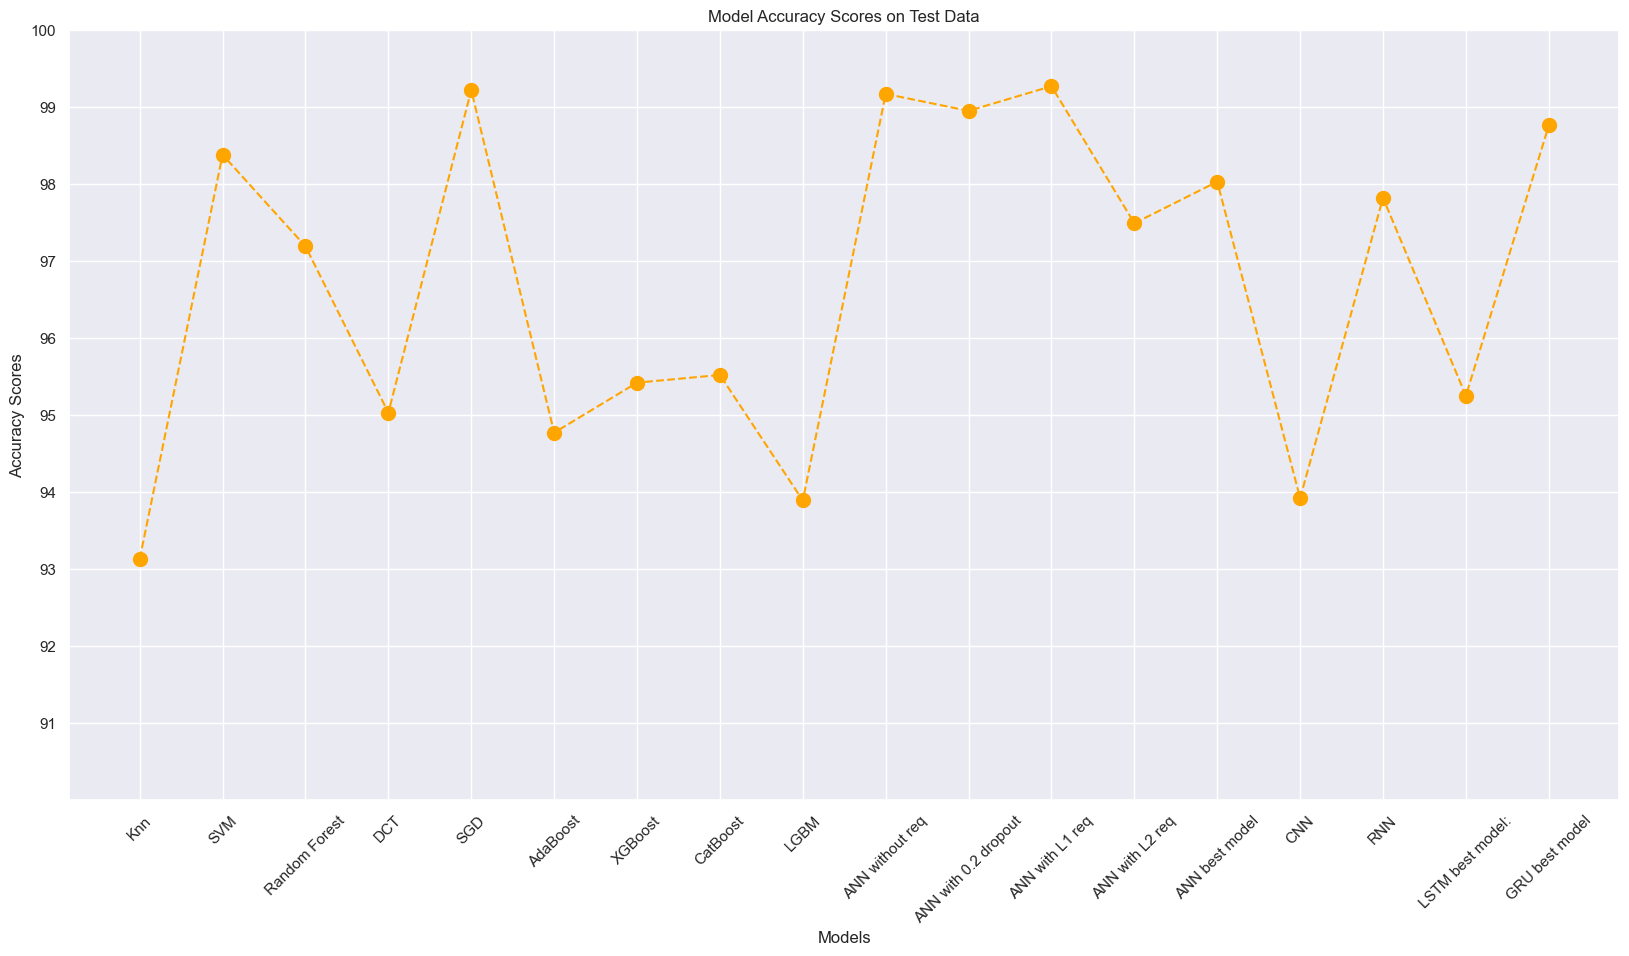

In [52]:
# Sözlüğü anahtar ve değerleri ayrı listelere ayır
models = list(accuracy_scores.keys())
scores = list(accuracy_scores.values())

# Tabloyu oluştur
plt.figure(figsize=(20, 10))
plt.plot(models, scores, markersize=10,marker='o', linestyle='dashed', color='orange')

# Eksen etiketlerini ve başlığını ekle
plt.xlabel('Models')
plt.ylabel('Accuracy Scores')
plt.title('Model Accuracy Scores on Test Data')

# X ekseni etiketlerini yatay olarak döndür
plt.xticks(rotation=45)
plt.ylim(90, 100)  # Y ekseni sınırlarını belirle
plt.yticks([91,92,93,94,95,96,97,98,99,100])

# Grafikleri göster
plt.show()

In [53]:
df_models = pd.DataFrame({'Model': models, 'Accuracy Scores': scores})
df_models = df_models.sort_values(by='Accuracy Scores', ascending=False, ignore_index=True)
print(df_models)

                   Model  Accuracy Scores
0        ANN with L1 req            99.27
1                    SGD            99.22
2        ANN without req            99.17
3   ANN with 0.2 dropout            98.95
4         GRU best model            98.76
5                    SVM            98.38
6         ANN best model            98.03
7                    RNN            97.82
8        ANN with L2 req            97.49
9          Random Forest            97.19
10              CatBoost            95.52
11               XGBoost            95.42
12      LSTM best model:            95.25
13                   DCT            95.03
14              AdaBoost            94.77
15                   CNN            93.92
16                  LGBM            93.89
17                   Knn            93.13


In [54]:
def confCal(model,modelName):
    y_pred = model.predict(X_test)
    plt.title(f"{modelName} Confusion Matrix for Test Data", fontdict={'fontsize':18})
    ax = sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d")

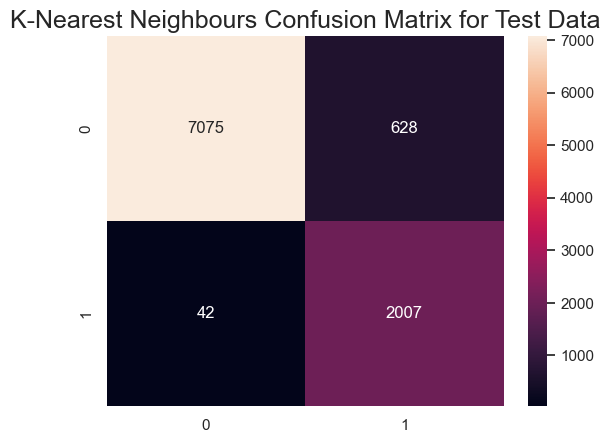

In [55]:
confCal(knn_model,'K-Nearest Neighbours')

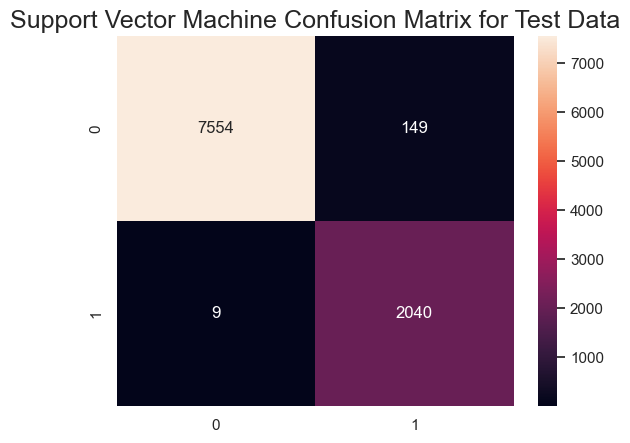

In [56]:
confCal(svm_model,'Support Vector Machine')

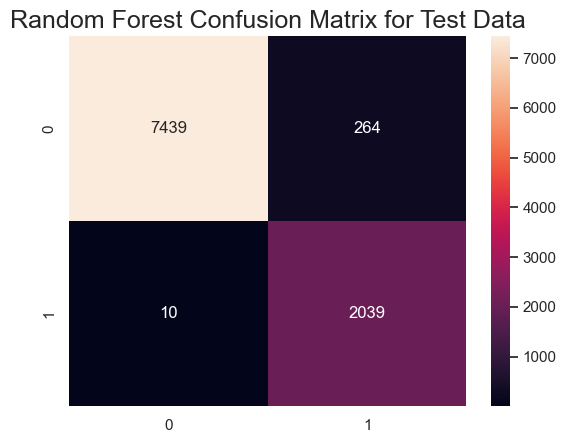

In [57]:
confCal(rf_model,'Random Forest')

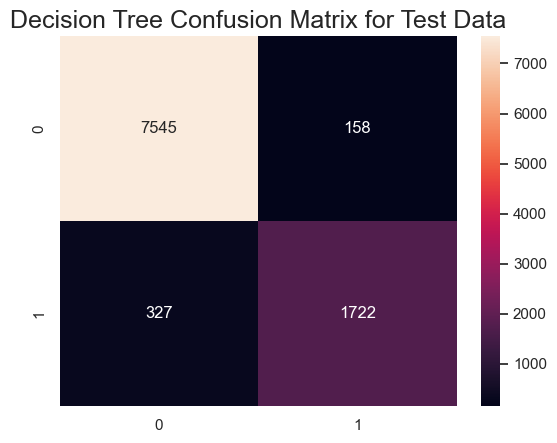

In [58]:
confCal(dct_model,'Decision Tree')

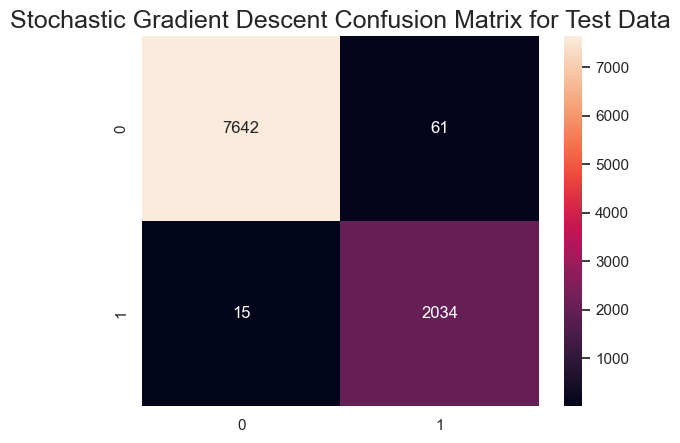

In [59]:
confCal(sgd_model,'Stochastic Gradient Descent')

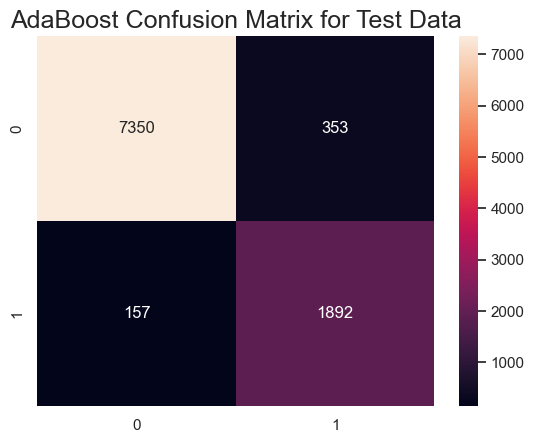

In [60]:
confCal(ada_model,'AdaBoost')

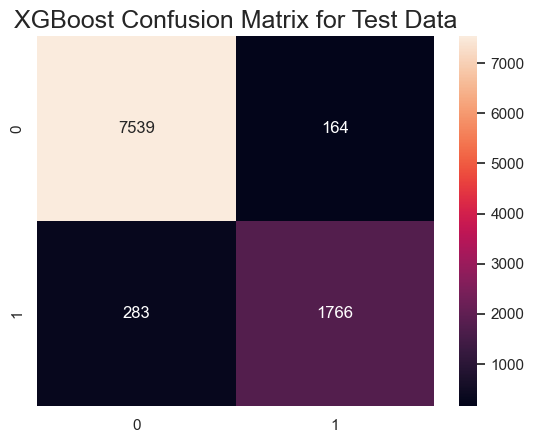

In [61]:
confCal(xgb_model,'XGBoost')

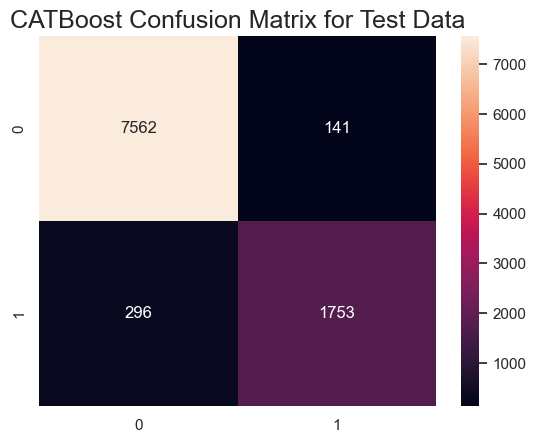

In [62]:
confCal(cat_model,'CATBoost')

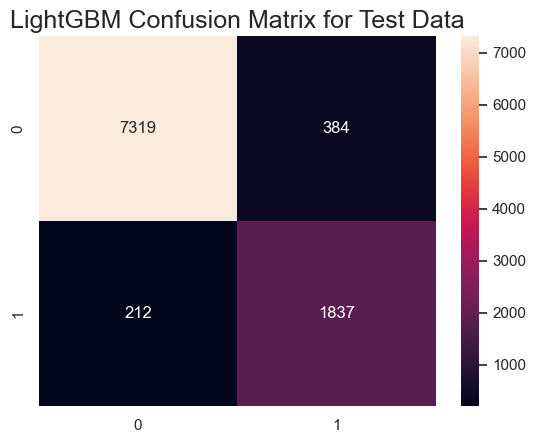

In [63]:
confCal(lgb_model,'LightGBM')

In [64]:
def confCalNN(model,modelName):
    y_pred = model.predict(X_test_cnn)
    threshold = 0.6
    y_pred = [1 if i >= threshold else 0 for i in y_pred]
    plt.title(f"{modelName} Confusion Matrix for Test Data", fontdict={'fontsize':18})
    ax = sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d")

305/305 [==============================] - 0s 528us/step


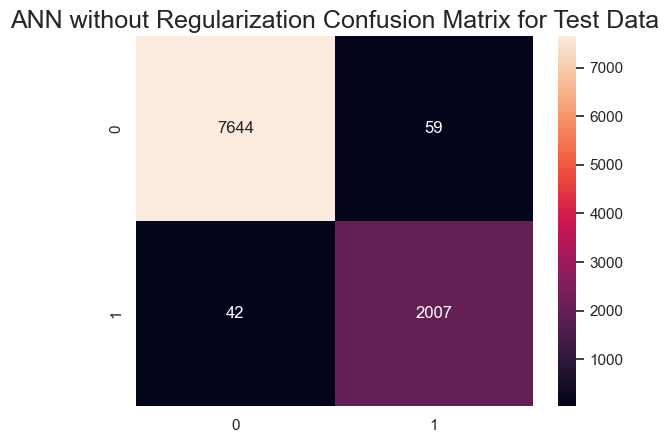

In [65]:
confCalNN(model1,'ANN without Regularization')

305/305 [==============================] - 0s 623us/step


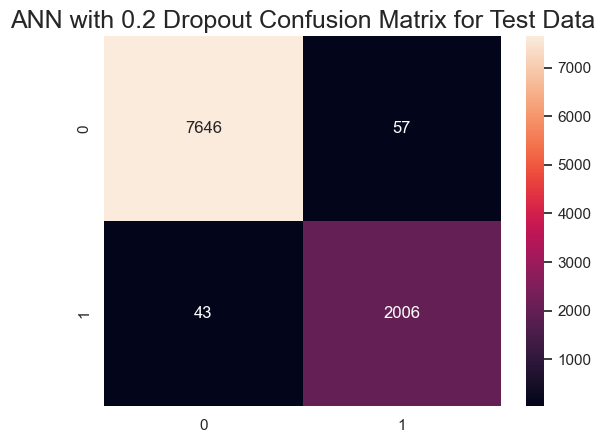

In [66]:
confCalNN(model2,'ANN with 0.2 Dropout')

305/305 [==============================] - 0s 515us/step


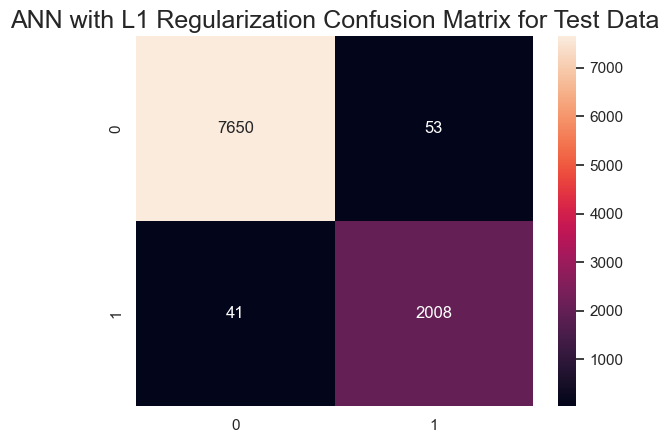

In [67]:
confCalNN(model3,'ANN with L1 Regularization')

305/305 [==============================] - 0s 700us/step


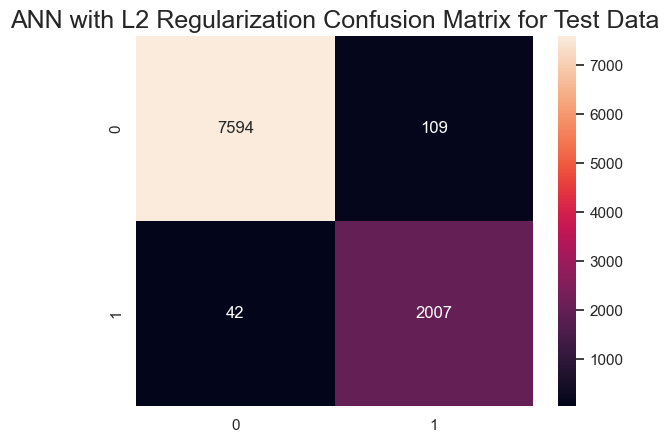

In [68]:
confCalNN(model4,'ANN with L2 Regularization')

305/305 [==============================] - 0s 537us/step


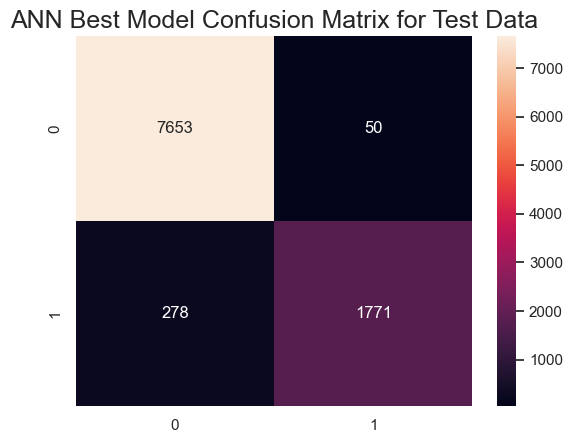

In [69]:
confCalNN(model,'ANN Best Model')

305/305 [==============================] - 0s 646us/step


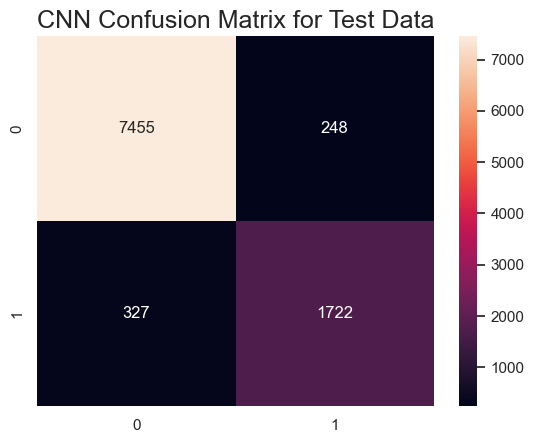

In [70]:
confCalNN(model_cnn,'CNN')

305/305 [==============================] - 0s 1ms/step


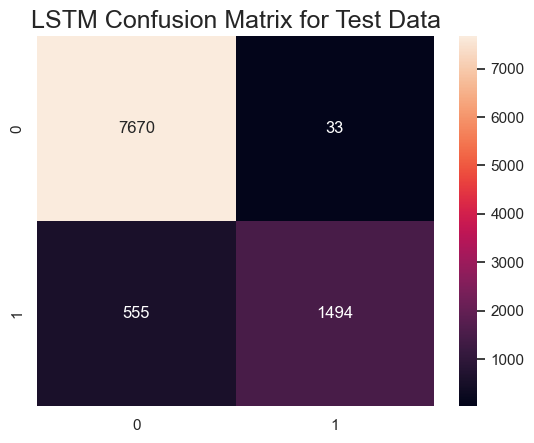

In [71]:
confCalNN(model_lstms[int(results_table_gru.index(max_f2_score))],'LSTM')

305/305 [==============================] - 0s 1ms/step


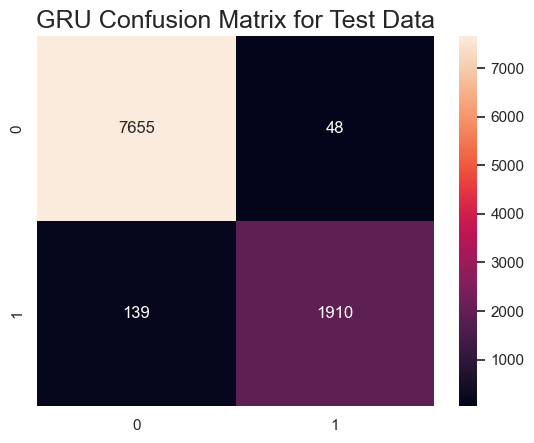

In [72]:
confCalNN(model_grus[int(results_table_gru.index(max_f2_score))],'GRU')

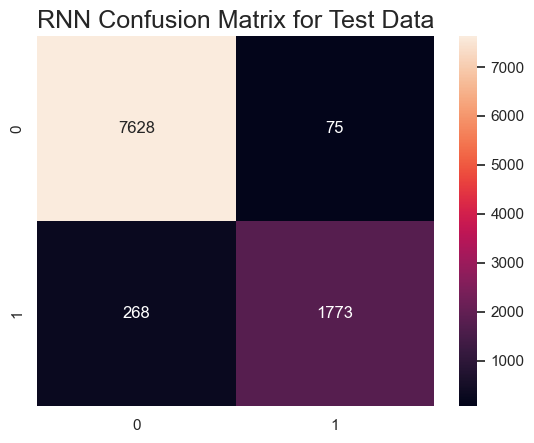

In [73]:
b_size = 24
tX, ty = np.asarray(X_test_3d).astype('float32'), np.asarray(y_test).astype('float32')
test_iter = mx.gluon.data.DataLoader(mx.gluon.data.ArrayDataset(tX, ty), 
                                    batch_size=b_size, shuffle=False, last_batch='discard')
pred_out = model_rnn.predict(test_iter, iter_type="dataloader", batch_size=b_size)


plt.title(f"RNN Confusion Matrix for Test Data", fontdict={'fontsize':18})
ax = sns.heatmap(confusion_matrix(y_test[:len(pred_out)], pred_out), annot=True, fmt="d")